In [1]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("..")
sys.path.append("../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SuperNet, AESuperNet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [2]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'

dir_train = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
dir_val = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'

dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [3]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [4]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale
writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')

In [5]:
net1 = SuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=64, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net1.to(device=device)
train_scores1, val_scores1, train_var_1, val_var_1 = train_net(net=net1,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  87%|████████▋ | 801/916 [00:30<00:04, 24.46batch/s]


Validation round: 100%|█████████▉| 913/916 [00:34<00:00, 28.94batch/s]
                                                                      INFO: Validation Dice Loss: 0.07280584639467007
Validation round:  69%|██████▊   | 628/916 [00:25<00:11, 25.28batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.96batch/s]
                                                                      INFO: Validation Dice Loss: 0.059410427440787505
Validation round:  54%|█████▍    | 493/916 [00:20<00:16, 25.05batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 25.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.05610763991666413
Epoch 1/8:  80%|███████▉  | 5856/7329 [02:30<00:07, 203.22img/s, loss (batch)=0.162]


Validation round: 100%|██████████| 916/916 [00:35<00:00, 25.81batch/s]
                                                                      INFO: Validation Dice Loss: 0.053295108493759125
Validation round:  22%|██▏       | 202/916 [00:08<00:28, 25.38batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 26.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.050599070420431776
Epoch 1/8: 100%|██████████| 7329/7329 [03:36<00:00, 33.81img/s, loss (batch)=0.173] 
INFO: Checkpoint 1 saved !
Validation round:   5%|▌         | 50/916 [00:02<00:39, 22.05batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 25.68batch/s]


                                                                      INFO: Validation Dice Loss: 0.04818122850234852
Validation round:  65%|██████▍   | 595/916 [00:22<00:14, 22.41batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 24.24batch/s]
                                                                      INFO: Validation Dice Loss: 0.0482802796360577
Validation round:  38%|███▊      | 351/916 [00:14<00:18, 30.79batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 25.29batch/s]
                                                                      INFO: Validation Dice Loss: 0.048298362984147136
Validation round:  24%|██▎       | 216/916 [00:08<00:28, 24.26batch/s]


Validation round: 100%|█████████▉| 912/916 [00:37<00:00, 24.70batch/s]
                                                                      INFO: Validation Dice Loss: 0.04708602074452363
Validation round:   8%|▊         | 73/916 [00:03<00:40, 21.02batch/s]


Validation round:  78%|███████▊  | 712/916 [00:26<00:07, 26.33batch/s]


Validation round: 100%|█████████▉| 912/916 [00:33<00:00, 30.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.047481204029253994
Epoch 2/8: 100%|██████████| 7329/7329 [03:36<00:00, 33.93img/s, loss (batch)=0.104]  
INFO: Checkpoint 2 saved !
Validation round:  46%|████▋     | 424/916 [00:15<00:16, 29.54batch/s]


Validation round: 100%|██████████| 916/916 [00:33<00:00, 30.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.04557632607729154
Validation round:   5%|▍         | 44/916 [00:02<00:47, 18.50batch/s]


Validation round:  64%|██████▍   | 585/916 [00:21<00:12, 26.23batch/s]


Validation round: 100%|█████████▉| 914/916 [00:33<00:00, 32.08batch/s]
                                                                      INFO: Validation Dice Loss: 0.04600175772691918
Validation round:  32%|███▏      | 296/916 [00:11<00:21, 28.57batch/s]


Validation round:  92%|█████████▏| 847/916 [00:31<00:02, 26.26batch/s]


Validation round: 100%|█████████▉| 915/916 [00:33<00:00, 28.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.04613699675354635
Validation round:  69%|██████▉   | 634/916 [00:24<00:12, 22.70batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 21.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.04593145659429278
Validation round:  55%|█████▍    | 503/916 [00:20<00:13, 29.84batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 25.34batch/s]
                                                                      INFO: Validation Dice Loss: 0.04420183805594278
Epoch 3/8: 100%|██████████| 7329/7329 [03:31<00:00, 34.73img/s, loss (batch)=0.0809] 
INFO: Checkpoint 3 saved !
Validation round:  31%|███▏      | 287/916 [00:11<00:23, 26.88batch/s]


Validation round:  99%|█████████▉| 910/916 [00:33<00:00, 28.84batch/s]
                                                                      INFO: Validation Dice Loss: 0.044039774604759885
Validation round:   5%|▍         | 45/916 [00:02<00:52, 16.59batch/s]


Validation round:  96%|█████████▌| 877/916 [00:36<00:01, 24.12batch/s]


Validation round:  99%|█████████▉| 909/916 [00:37<00:00, 21.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.04456137041825655
Validation round:  73%|███████▎  | 668/916 [00:27<00:09, 25.27batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 24.81batch/s]
                                                                      INFO: Validation Dice Loss: 0.04430643574021529
Validation round:  49%|████▊     | 445/916 [00:18<00:18, 24.86batch/s]


Validation round:  99%|█████████▉| 909/916 [00:37<00:00, 25.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.04402874920956432
Validation round:  21%|██▏       | 195/916 [00:08<00:30, 23.70batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 26.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.04394654122762805
Epoch 4/8: 100%|██████████| 7329/7329 [03:39<00:00, 33.41img/s, loss (batch)=0.0905] 
INFO: Checkpoint 4 saved !
Validation round:   9%|▊         | 78/916 [00:03<00:42, 19.73batch/s]


Validation round:  99%|█████████▉| 910/916 [00:37<00:00, 26.33batch/s]
                                                                      INFO: Validation Dice Loss: 0.04396194544942098


Validation round:  63%|██████▎   | 574/916 [00:21<00:12, 26.71batch/s]


Validation round:  99%|█████████▉| 911/916 [00:33<00:00, 27.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.043899219304193056
Validation round:  25%|██▌       | 230/916 [00:08<00:23, 29.63batch/s]


Validation round:  85%|████████▌ | 779/916 [00:28<00:05, 23.23batch/s]


Validation round: 100%|█████████▉| 912/916 [00:33<00:00, 27.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.043956234888478656
Validation round:  47%|████▋     | 432/916 [00:15<00:17, 27.76batch/s]


Validation round:  99%|█████████▉| 910/916 [00:33<00:00, 25.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.0439060757497903
Validation round:  11%|█         | 98/916 [00:04<00:27, 29.72batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 25.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.044196648466274725


Epoch 5/8: 100%|██████████| 7329/7329 [03:29<00:00, 34.95img/s, loss (batch)=0.0626] 
INFO: Checkpoint 5 saved !
Validation round:  62%|██████▏   | 571/916 [00:20<00:11, 29.71batch/s]


Validation round:  99%|█████████▉| 910/916 [00:33<00:00, 29.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.043762315308683304
Validation round:  34%|███▍      | 310/916 [00:12<00:24, 24.53batch/s]


Validation round: 100%|█████████▉| 912/916 [00:35<00:00, 24.98batch/s]
                                                                      INFO: Validation Dice Loss: 0.04373325667787327
Validation round:   9%|▉         | 84/916 [00:03<00:31, 26.05batch/s]


Validation round:  79%|███████▉  | 723/916 [00:27<00:07, 26.99batch/s]


Validation round: 100%|█████████▉| 915/916 [00:33<00:00, 32.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.0437077899589549
Validation round:  47%|████▋     | 430/916 [00:16<00:17, 28.56batch/s]


Validation round: 100%|█████████▉| 915/916 [00:33<00:00, 33.55batch/s]
                                                                      INFO: Validation Dice Loss: 0.04367844357793768
Validation round:  33%|███▎      | 302/916 [00:12<00:25, 24.39batch/s]


Validation round:  99%|█████████▉| 910/916 [00:37<00:00, 25.25batch/s]
                                                                      INFO: Validation Dice Loss: 0.043808303366712084
Epoch 6/8: 100%|██████████| 7329/7329 [03:31<00:00, 34.68img/s, loss (batch)=0.129]  
INFO: Checkpoint 6 saved !
Validation round:  20%|██        | 185/916 [00:08<00:32, 22.42batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 31.56batch/s]
                                                                      INFO: Validation Dice Loss: 0.04381837358283424
Validation round:   3%|▎         | 25/916 [00:01<04:47,  3.10batch/s]


Validation round:  73%|███████▎  | 668/916 [00:24<00:09, 25.99batch/s]


Validation round:  99%|█████████▉| 909/916 [00:33<00:00, 29.52batch/s]
                                                                      INFO: Validation Dice Loss: 0.043795281313522415
Validation round:  32%|███▏      | 294/916 [00:13<00:29, 21.19batch/s]


Validation round:  80%|████████  | 734/916 [00:34<00:10, 16.79batch/s]


Validation round: 100%|██████████| 916/916 [00:42<00:00, 22.79batch/s]
                                                                      INFO: Validation Dice Loss: 0.04379818450220287
Validation round:  33%|███▎      | 306/916 [00:14<00:27, 21.84batch/s]


Validation round:  96%|█████████▌| 878/916 [00:39<00:01, 22.10batch/s]


Validation round: 100%|█████████▉| 913/916 [00:41<00:00, 25.31batch/s]
                                                                      INFO: Validation Dice Loss: 0.04377808381994479
Validation round:  62%|██████▏   | 566/916 [00:25<00:19, 17.71batch/s]


Validation round: 100%|█████████▉| 913/916 [00:40<00:00, 24.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.043736004762709405
Epoch 7/8: 100%|██████████| 7329/7329 [03:52<00:00, 31.49img/s, loss (batch)=0.115]  
INFO: Checkpoint 7 saved !
Validation round:  20%|█▉        | 179/916 [00:08<00:33, 21.92batch/s]


Validation round:  71%|███████   | 648/916 [00:27<00:11, 22.75batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 22.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.043737610549905936
Validation round:  30%|███       | 276/916 [00:12<00:30, 21.03batch/s]


Validation round:  87%|████████▋ | 796/916 [00:33<00:05, 20.83batch/s]


Validation round: 100%|█████████▉| 914/916 [00:38<00:00, 26.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.04373973294864836
Validation round:  35%|███▍      | 320/916 [00:14<00:26, 22.26batch/s]


Validation round:  92%|█████████▏| 845/916 [00:35<00:03, 23.20batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 26.22batch/s]
                                                                      INFO: Validation Dice Loss: 0.04374184696955452
Validation round:  48%|████▊     | 443/916 [00:18<00:19, 23.82batch/s]


Validation round: 100%|█████████▉| 912/916 [00:38<00:00, 20.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.043741837217102404
Validation round:   5%|▍         | 44/916 [00:02<00:59, 14.59batch/s]


Validation round:  71%|███████   | 652/916 [00:27<00:11, 23.33batch/s]


Validation round: 100%|██████████| 916/916 [00:38<00:00, 26.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.043741765029435595
Epoch 8/8: 100%|██████████| 7329/7329 [03:52<00:00, 31.53img/s, loss (batch)=0.0969] 
INFO: Checkpoint 8 saved !


In [6]:
net2 = SuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=128, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net2.to(device=device)
train_scores2, val_scores2, train_var_2, val_var_2 = train_net(net=net2,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  69%|██████▉   | 635/916 [00:26<00:10, 26.13batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 25.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.0728036075358698
Validation round:  41%|████      | 374/916 [00:15<00:21, 25.42batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.84batch/s]
                                                                      INFO: Validation Dice Loss: 0.06396304446732112
Validation round:   0%|          | 1/916 [00:00<11:57,  1.28batch/s]


Validation round:  87%|████████▋ | 793/916 [00:31<00:04, 25.80batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.46batch/s]
                                                                      INFO: Validation Dice Loss: 0.054596576319120856
Validation round:  66%|██████▌   | 604/916 [00:24<00:13, 23.44batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 23.29batch/s]
                                                                      INFO: Validation Dice Loss: 0.055831370940309946
Validation round:  32%|███▏      | 290/916 [00:12<00:27, 23.13batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.63batch/s]
                                                                      INFO: Validation Dice Loss: 0.05200922509500814
Epoch 1/8: 100%|██████████| 7329/7329 [03:40<00:00, 33.20img/s, loss (batch)=0.213] 
INFO: Checkpoint 1 saved !
Validation round:  15%|█▌        | 140/916 [00:06<00:32, 23.67batch/s]


Validation round:  74%|███████▍  | 677/916 [00:27<00:10, 22.91batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 27.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.0548815946359041
Validation round:  36%|███▋      | 333/916 [00:13<00:25, 22.56batch/s]


Validation round:  99%|█████████▉| 909/916 [00:35<00:00, 25.47batch/s]
                                                                      INFO: Validation Dice Loss: 0.048715261417119786
Validation round:  19%|█▊        | 170/916 [00:07<00:29, 25.44batch/s]


Validation round:  81%|████████  | 738/916 [00:29<00:07, 24.78batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 24.49batch/s]
                                                                      INFO: Validation Dice Loss: 0.048459407641637794
Validation round:  51%|█████▏    | 470/916 [00:19<00:18, 24.70batch/s]


Validation round:  99%|█████████▉| 910/916 [00:36<00:00, 25.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.04397618645338512
Validation round:  32%|███▏      | 291/916 [00:12<00:24, 25.47batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.52batch/s]
                                                                      INFO: Validation Dice Loss: 0.04357217833822731
Epoch 2/8: 100%|██████████| 7329/7329 [03:38<00:00, 33.50img/s, loss (batch)=0.0741] 
INFO: Checkpoint 2 saved !
Validation round:  11%|█         | 101/916 [00:04<00:32, 25.00batch/s]


Validation round:  70%|██████▉   | 639/916 [00:25<00:11, 23.80batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 26.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.045661153149787
Validation round:  44%|████▍     | 407/916 [00:16<00:21, 23.92batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 26.85batch/s]
                                                                      INFO: Validation Dice Loss: 0.04760346277799929
Validation round:  16%|█▌        | 145/916 [00:06<00:35, 21.49batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.04220282095260756
Validation round:   3%|▎         | 28/916 [00:01<01:54,  7.78batch/s]


Validation round:  73%|███████▎  | 666/916 [00:29<00:13, 18.61batch/s]


Validation round: 100%|█████████▉| 913/916 [00:42<00:00, 21.79batch/s]
                                                                      INFO: Validation Dice Loss: 0.0439490989973061
Validation round:  24%|██▍       | 221/916 [00:11<00:33, 20.93batch/s]


Validation round:  73%|███████▎  | 673/916 [00:31<00:10, 23.85batch/s]


Validation round: 100%|██████████| 916/916 [00:42<00:00, 26.16batch/s]
                                                                      INFO: Validation Dice Loss: 0.04468869252789229
Epoch 3/8: 100%|██████████| 7329/7329 [03:53<00:00, 31.40img/s, loss (batch)=0.11]   
INFO: Checkpoint 3 saved !
Validation round:  20%|█▉        | 179/916 [00:09<00:38, 19.13batch/s]


Validation round:  70%|███████   | 642/916 [00:30<00:12, 22.39batch/s]


Validation round: 100%|█████████▉| 913/916 [00:41<00:00, 34.79batch/s]
                                                                      INFO: Validation Dice Loss: 0.042028189055198666
Validation round:  27%|██▋       | 251/916 [00:10<00:25, 25.72batch/s]


Validation round:  87%|████████▋ | 800/916 [00:36<00:06, 16.88batch/s]


Validation round: 100%|█████████▉| 914/916 [00:42<00:00, 21.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.04099146848520077
Validation round:  35%|███▍      | 320/916 [00:15<00:28, 20.96batch/s]


Validation round:  86%|████████▌ | 786/916 [00:36<00:06, 19.79batch/s]


Validation round: 100%|██████████| 916/916 [00:42<00:00, 25.05batch/s]
                                                                      INFO: Validation Dice Loss: 0.041028782416248945
Validation round:  34%|███▎      | 308/916 [00:15<00:30, 19.95batch/s]


Validation round:  80%|████████  | 734/916 [00:34<00:08, 21.47batch/s]


Validation round: 100%|█████████▉| 914/916 [00:42<00:00, 23.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.044467418434252906
Validation round:  35%|███▍      | 320/916 [00:13<00:19, 31.20batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 21.35batch/s]
                                                                      INFO: Validation Dice Loss: 0.043731837805897386
Epoch 4/8: 100%|██████████| 7329/7329 [04:09<00:00, 29.37img/s, loss (batch)=0.106]  
INFO: Checkpoint 4 saved !
Validation round:   2%|▏         | 20/916 [00:01<01:43,  8.63batch/s]


Validation round:  50%|█████     | 459/916 [00:22<00:19, 23.22batch/s]


Validation round: 100%|██████████| 916/916 [00:43<00:00, 24.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.040173124684647184
Validation round:   0%|          | 0/916 [00:00<?, ?batch/s]


Validation round:  48%|████▊     | 441/916 [00:21<00:23, 20.26batch/s]


Validation round:  98%|█████████▊| 902/916 [00:41<00:00, 24.26batch/s]


Validation round: 100%|█████████▉| 914/916 [00:42<00:00, 22.75batch/s]
                                                                      INFO: Validation Dice Loss: 0.04056850290454631
Validation round:  47%|████▋     | 429/916 [00:20<00:25, 19.10batch/s]


Validation round: 100%|██████████| 916/916 [00:41<00:00, 28.14batch/s]


                                                                      INFO: Validation Dice Loss: 0.039924346000021205
Validation round:  81%|████████  | 743/916 [00:29<00:07, 24.64batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.04019492422942251
Validation round:  54%|█████▎    | 492/916 [00:20<00:17, 24.52batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 26.00batch/s]
                                                                      INFO: Validation Dice Loss: 0.03990996220681865
Epoch 5/8: 100%|██████████| 7329/7329 [04:02<00:00, 30.21img/s, loss (batch)=0.124]  
INFO: Checkpoint 5 saved !
Validation round:  36%|███▌      | 331/916 [00:13<00:23, 25.15batch/s]


Validation round:  97%|█████████▋| 886/916 [00:35<00:01, 22.85batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 22.21batch/s]
                                                                      INFO: Validation Dice Loss: 0.04001774384302604
Validation round:  76%|███████▌  | 695/916 [00:27<00:08, 25.86batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 25.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.039928293888615726
Validation round:  65%|██████▍   | 593/916 [00:24<00:12, 25.31batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.039920871426640116
Validation round:  35%|███▍      | 319/916 [00:13<00:24, 24.18batch/s]


Validation round:  86%|████████▋ | 791/916 [00:31<00:04, 26.45batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 24.96batch/s]
                                                                      INFO: Validation Dice Loss: 0.039804584879476954
Validation round:  41%|████      | 373/916 [00:15<00:21, 25.39batch/s]


Validation round:  99%|█████████▉| 909/916 [00:35<00:00, 26.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.03987086233255905
Epoch 6/8: 100%|██████████| 7329/7329 [03:38<00:00, 33.60img/s, loss (batch)=0.0889] 
INFO: Checkpoint 6 saved !
Validation round:  27%|██▋       | 243/916 [00:10<00:25, 25.99batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 25.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.03980106236535128
Validation round:  11%|█         | 98/916 [00:04<00:33, 24.37batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.16batch/s]
                                                                      INFO: Validation Dice Loss: 0.039761390333678
Validation round:   2%|▏         | 18/916 [00:01<04:48,  3.12batch/s]


Validation round:  52%|█████▏    | 472/916 [00:19<00:20, 22.05batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 25.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.03977518262723908
Validation round:  14%|█▎        | 125/916 [00:05<00:27, 28.37batch/s]


Validation round:  69%|██████▉   | 630/916 [00:25<00:09, 31.49batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 23.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.03988802511098603
Validation round:  56%|█████▋    | 517/916 [00:20<00:13, 28.53batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 24.09batch/s]
                                                                      INFO: Validation Dice Loss: 0.039876982049129935
Epoch 7/8: 100%|██████████| 7329/7329 [03:37<00:00, 33.65img/s, loss (batch)=0.0838] 
INFO: Checkpoint 7 saved !
Validation round:  17%|█▋        | 158/916 [00:06<00:25, 30.00batch/s]


Validation round:  89%|████████▊ | 812/916 [00:32<00:04, 25.18batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.039804775487452614
Validation round:  44%|████▍     | 401/916 [00:19<00:26, 19.10batch/s]


Validation round:  95%|█████████▍| 869/916 [00:43<00:02, 19.60batch/s]


Validation round: 100%|█████████▉| 913/916 [00:45<00:00, 20.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.03979212458867694
Validation round:  39%|███▉      | 361/916 [00:17<00:26, 21.28batch/s]


Validation round:  90%|████████▉ | 822/916 [00:38<00:05, 18.11batch/s]


Validation round: 100%|█████████▉| 915/916 [00:42<00:00, 26.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.03979058899636092
Validation round:  50%|█████     | 458/916 [00:22<00:24, 18.56batch/s]


Validation round: 100%|█████████▉| 915/916 [00:44<00:00, 21.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.039786268326588076
Validation round:   3%|▎         | 32/916 [00:02<01:33,  9.46batch/s]


Validation round:  50%|█████     | 458/916 [00:22<00:19, 23.12batch/s]


Validation round:  97%|█████████▋| 888/916 [00:41<00:01, 18.95batch/s]


Validation round: 100%|█████████▉| 912/916 [00:42<00:00, 22.22batch/s]
                                                                      INFO: Validation Dice Loss: 0.0397833255017949
Epoch 8/8: 100%|██████████| 7329/7329 [04:13<00:00, 28.87img/s, loss (batch)=0.0817] 
INFO: Checkpoint 8 saved !


In [7]:
net3 = SuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=200, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net3.to(device=device)
train_scores3, val_scores3, train_var_3, val_var_3 = train_net(net=net3,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  38%|███▊      | 348/916 [00:16<00:23, 23.70batch/s]


Validation round:  78%|███████▊  | 718/916 [00:33<00:10, 19.58batch/s]


Validation round: 100%|██████████| 916/916 [00:43<00:00, 19.98batch/s]
                                                                      INFO: Validation Dice Loss: 0.11952163702015273
Validation round:  21%|██        | 188/916 [00:08<00:34, 21.19batch/s]


Validation round:  75%|███████▌  | 690/916 [00:28<00:08, 25.78batch/s]


Validation round: 100%|█████████▉| 915/916 [00:39<00:00, 20.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.1168098788724716
Validation round:  16%|█▌        | 148/916 [00:08<00:44, 17.18batch/s]


Validation round:  54%|█████▍    | 496/916 [00:24<00:18, 22.29batch/s]


Validation round:  94%|█████████▍| 859/916 [00:41<00:02, 19.65batch/s]


Validation round: 100%|█████████▉| 914/916 [00:44<00:00, 23.76batch/s]
                                                                      INFO: Validation Dice Loss: 0.11429866166647085
Validation round:  33%|███▎      | 299/916 [00:15<00:28, 21.89batch/s]


Validation round:  73%|███████▎  | 672/916 [00:32<00:11, 21.94batch/s]


Validation round: 100%|█████████▉| 914/916 [00:43<00:00, 26.87batch/s]
                                                                      INFO: Validation Dice Loss: 0.10988683063195262
Validation round:  13%|█▎        | 123/916 [00:06<00:35, 22.17batch/s]


Validation round:  59%|█████▉    | 540/916 [00:28<00:23, 16.17batch/s]


Validation round: 100%|██████████| 916/916 [00:43<00:00, 21.81batch/s]
                                                                      INFO: Validation Dice Loss: 0.10720053355018384
Epoch 1/8: 100%|██████████| 7329/7329 [04:42<00:00, 25.91img/s, loss (batch)=0.521] 
INFO: Checkpoint 1 saved !
Validation round:   8%|▊         | 74/916 [00:03<00:41, 20.52batch/s]


Validation round:  63%|██████▎   | 576/916 [00:23<00:12, 26.98batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 22.81batch/s]
                                                                      INFO: Validation Dice Loss: 0.10718557143413084
Validation round:  14%|█▎        | 125/916 [00:05<00:37, 21.19batch/s]


Validation round:  62%|██████▏   | 570/916 [00:23<00:13, 25.47batch/s]


Validation round: 100%|█████████▉| 913/916 [00:37<00:00, 26.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.10572931319312498
Validation round:  11%|█▏        | 105/916 [00:04<00:33, 24.45batch/s]


Validation round:  64%|██████▎   | 582/916 [00:23<00:15, 22.19batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 24.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.09855845930079185
Validation round:  15%|█▌        | 138/916 [00:06<00:32, 24.00batch/s]


Validation round:  65%|██████▌   | 597/916 [00:24<00:12, 25.42batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 22.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.1009210970447964
Validation round:  16%|█▌        | 145/916 [00:06<00:30, 25.53batch/s]


Validation round:  71%|███████   | 648/916 [00:26<00:09, 26.89batch/s]


Validation round: 100%|█████████▉| 914/916 [00:39<00:00, 17.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.10139022797638933
Epoch 2/8: 100%|██████████| 7329/7329 [04:12<00:00, 29.01img/s, loss (batch)=0.4]   
INFO: Checkpoint 2 saved !
Validation round:  13%|█▎        | 116/916 [00:06<00:37, 21.09batch/s]


Validation round:  53%|█████▎    | 484/916 [00:23<00:23, 18.24batch/s]


Validation round:  93%|█████████▎| 853/916 [00:41<00:03, 17.90batch/s]


Validation round: 100%|██████████| 916/916 [00:44<00:00, 23.49batch/s]
                                                                      INFO: Validation Dice Loss: 0.09811088655908555
Validation round:  32%|███▏      | 292/916 [00:14<00:29, 21.21batch/s]


Validation round:  74%|███████▎  | 674/916 [00:32<00:10, 22.06batch/s]


Validation round: 100%|█████████▉| 914/916 [00:42<00:00, 22.33batch/s]
                                                                      INFO: Validation Dice Loss: 0.10182544718370427
Validation round:  14%|█▍        | 130/916 [00:06<00:34, 22.74batch/s]


Validation round:  54%|█████▍    | 496/916 [00:23<00:18, 22.19batch/s]


Validation round:  95%|█████████▍| 870/916 [00:41<00:02, 20.54batch/s]


Validation round: 100%|█████████▉| 914/916 [00:43<00:00, 23.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.09172459453441952
Validation round:  34%|███▍      | 315/916 [00:15<00:29, 20.24batch/s]


Validation round:  74%|███████▍  | 681/916 [00:32<00:10, 21.61batch/s]


Validation round: 100%|█████████▉| 915/916 [00:43<00:00, 21.92batch/s]
                                                                      INFO: Validation Dice Loss: 0.09409242966029321
Validation round:  12%|█▏        | 108/916 [00:06<00:47, 17.05batch/s]


Validation round:  51%|█████     | 468/916 [00:22<00:20, 21.80batch/s]


Validation round:  94%|█████████▍| 859/916 [00:40<00:02, 21.72batch/s]


Validation round: 100%|█████████▉| 915/916 [00:43<00:00, 23.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.09199664262672438
Epoch 3/8: 100%|██████████| 7329/7329 [04:46<00:00, 25.57img/s, loss (batch)=0.413] 
INFO: Checkpoint 3 saved !
Validation round:  32%|███▏      | 292/916 [00:14<00:30, 20.53batch/s]


Validation round:  72%|███████▏  | 664/916 [00:31<00:13, 18.56batch/s]


Validation round: 100%|█████████▉| 915/916 [00:43<00:00, 22.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.0911847305398711
Validation round:  11%|█         | 102/916 [00:05<00:37, 21.93batch/s]


Validation round:  50%|█████     | 459/916 [00:23<00:23, 19.58batch/s]


Validation round:  91%|█████████ | 832/916 [00:40<00:03, 23.91batch/s]


Validation round: 100%|█████████▉| 914/916 [00:44<00:00, 22.52batch/s]
                                                                      INFO: Validation Dice Loss: 0.0923433425840332
Validation round:  29%|██▉       | 265/916 [00:13<00:30, 21.33batch/s]


Validation round:  69%|██████▉   | 636/916 [00:29<00:13, 20.44batch/s]


Validation round: 100%|██████████| 916/916 [00:42<00:00, 23.10batch/s]
                                                                      INFO: Validation Dice Loss: 0.06731145614229435
Validation round:  10%|█         | 93/916 [00:05<00:35, 23.24batch/s]


Validation round:  51%|█████     | 468/916 [00:22<00:21, 20.84batch/s]


Validation round:  91%|█████████▏| 837/916 [00:39<00:04, 17.58batch/s]


Validation round: 100%|██████████| 916/916 [00:43<00:00, 23.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.06640151849903134
Validation round:  27%|██▋       | 251/916 [00:13<00:34, 19.19batch/s]


Validation round:  66%|██████▌   | 605/916 [00:29<00:13, 22.32batch/s]


Validation round: 100%|█████████▉| 912/916 [00:44<00:00, 21.46batch/s]
                                                                      INFO: Validation Dice Loss: 0.06630041486864267
Epoch 4/8: 100%|██████████| 7329/7329 [04:47<00:00, 25.52img/s, loss (batch)=0.264] 
INFO: Checkpoint 4 saved !
Validation round:   4%|▍         | 41/916 [00:02<00:54, 16.03batch/s]


Validation round:  44%|████▍     | 401/916 [00:19<00:24, 20.74batch/s]


Validation round:  85%|████████▍ | 777/916 [00:36<00:06, 22.09batch/s]


Validation round: 100%|█████████▉| 914/916 [00:43<00:00, 27.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.06551267038298747
Validation round:  25%|██▍       | 227/916 [00:11<00:33, 20.71batch/s]


Validation round:  67%|██████▋   | 617/916 [00:29<00:12, 24.23batch/s]


Validation round: 100%|█████████▉| 913/916 [00:43<00:00, 23.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.06567542812091555
Validation round:   6%|▌         | 51/916 [00:03<00:46, 18.48batch/s]


Validation round:  44%|████▍     | 406/916 [00:20<00:25, 20.20batch/s]


Validation round:  85%|████████▌ | 783/916 [00:37<00:06, 19.88batch/s]


Validation round: 100%|██████████| 916/916 [00:43<00:00, 22.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.06623792968788002
Validation round:  23%|██▎       | 214/916 [00:10<00:32, 21.55batch/s]


Validation round:  65%|██████▍   | 591/916 [00:27<00:17, 18.98batch/s]


Validation round: 100%|█████████▉| 913/916 [00:42<00:00, 23.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.06562474714876783
Validation round:   4%|▍         | 37/916 [00:02<00:50, 17.49batch/s]


Validation round:  45%|████▍     | 412/916 [00:19<00:22, 22.06batch/s]


Validation round:  86%|████████▌ | 787/916 [00:37<00:07, 18.38batch/s]


Validation round: 100%|█████████▉| 913/916 [00:43<00:00, 21.95batch/s]
                                                                      INFO: Validation Dice Loss: 0.06473797739495617
Epoch 5/8: 100%|██████████| 7329/7329 [04:45<00:00, 25.69img/s, loss (batch)=0.284] 
INFO: Checkpoint 5 saved !
Validation round:  24%|██▍       | 218/916 [00:11<00:33, 20.68batch/s]


Validation round:  63%|██████▎   | 573/916 [00:28<00:15, 21.46batch/s]


Validation round: 100%|█████████▉| 912/916 [00:44<00:00, 23.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.06476233722276042
Validation round:   1%|          | 9/916 [00:01<05:20,  2.83batch/s]


Validation round:  41%|████▏     | 380/916 [00:18<00:24, 21.87batch/s]


Validation round:  83%|████████▎ | 756/916 [00:35<00:07, 22.81batch/s]


Validation round: 100%|█████████▉| 914/916 [00:42<00:00, 24.84batch/s]
                                                                      INFO: Validation Dice Loss: 0.06453714571795609
Validation round:  21%|██        | 190/916 [00:09<00:35, 20.65batch/s]


Validation round:  61%|██████    | 559/916 [00:26<00:15, 22.68batch/s]


Validation round: 100%|█████████▉| 915/916 [00:43<00:00, 24.78batch/s]
                                                                      INFO: Validation Dice Loss: 0.06471443240526722
Validation round:   0%|          | 1/916 [00:00<12:34,  1.21batch/s]


Validation round:  38%|███▊      | 351/916 [00:17<00:25, 21.83batch/s]


Validation round:  78%|███████▊  | 719/916 [00:34<00:10, 19.19batch/s]


Validation round: 100%|█████████▉| 915/916 [00:43<00:00, 25.09batch/s]
                                                                      INFO: Validation Dice Loss: 0.06458410974510632
Validation round:  17%|█▋        | 154/916 [00:08<00:37, 20.14batch/s]


Validation round:  58%|█████▊    | 533/916 [00:25<00:16, 23.76batch/s]


Validation round:  99%|█████████▉| 908/916 [00:42<00:00, 21.82batch/s]


Validation round: 100%|█████████▉| 915/916 [00:42<00:00, 23.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.06450635729170523
Epoch 6/8: 100%|██████████| 7329/7329 [04:46<00:00, 25.60img/s, loss (batch)=0.296] 
INFO: Checkpoint 6 saved !
Epoch 7/8:  19%|█▊        | 1368/7329 [00:30<00:53, 110.48img/s, loss (batch)=0.277]


Validation round:  78%|███████▊  | 714/916 [00:33<00:09, 21.28batch/s]


Validation round: 100%|█████████▉| 912/916 [00:43<00:00, 20.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.06449196752014379
Validation round:  15%|█▍        | 137/916 [00:07<00:33, 23.26batch/s]


Validation round:  55%|█████▍    | 500/916 [00:24<00:24, 17.25batch/s]


Validation round:  94%|█████████▍| 863/916 [00:41<00:02, 21.12batch/s]


Validation round: 100%|█████████▉| 915/916 [00:44<00:00, 21.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.06379515396260278
Validation round:  32%|███▏      | 294/916 [00:14<00:25, 24.18batch/s]


Validation round:  73%|███████▎  | 673/916 [00:31<00:10, 23.21batch/s]


Validation round: 100%|██████████| 916/916 [00:42<00:00, 23.77batch/s]
                                                                      INFO: Validation Dice Loss: 0.06420017707295814
Validation round:  11%|█         | 102/916 [00:05<00:41, 19.65batch/s]


Validation round:  51%|█████▏    | 471/916 [00:22<00:19, 22.71batch/s]


Validation round:  92%|█████████▏| 845/916 [00:39<00:03, 20.93batch/s]


Validation round: 100%|█████████▉| 915/916 [00:43<00:00, 23.09batch/s]
                                                                      INFO: Validation Dice Loss: 0.06468443210566148
Validation round:  31%|███       | 280/916 [00:13<00:25, 24.48batch/s]


Validation round:  71%|███████   | 648/916 [00:31<00:11, 23.79batch/s]


Validation round: 100%|█████████▉| 914/916 [00:43<00:00, 24.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.06432869317880364
Epoch 7/8: 100%|██████████| 7329/7329 [04:46<00:00, 25.60img/s, loss (batch)=0.294] 
INFO: Checkpoint 7 saved !
Validation round:   9%|▉         | 82/916 [00:04<00:43, 19.09batch/s]


Validation round:  50%|████▉     | 455/916 [00:21<00:20, 22.60batch/s]


Validation round:  91%|█████████▏| 836/916 [00:39<00:03, 20.36batch/s]


Validation round: 100%|█████████▉| 913/916 [00:42<00:00, 22.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.06433339304734005
Validation round:  32%|███▏      | 291/916 [00:14<00:28, 22.18batch/s]


Validation round:  73%|███████▎  | 669/916 [00:32<00:10, 23.03batch/s]


Validation round: 100%|█████████▉| 915/916 [00:44<00:00, 22.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.06425070559288737
Validation round:  12%|█▏        | 109/916 [00:06<00:37, 21.57batch/s]


Validation round:  51%|█████     | 463/916 [00:22<00:24, 18.75batch/s]


Validation round:  91%|█████████ | 829/916 [00:40<00:04, 19.30batch/s]


Validation round: 100%|██████████| 916/916 [00:44<00:00, 23.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.06427355848382914
Validation round:  29%|██▉       | 266/916 [00:13<00:30, 21.17batch/s]


Validation round:  70%|██████▉   | 637/916 [00:30<00:13, 21.06batch/s]


Validation round: 100%|█████████▉| 914/916 [00:43<00:00, 22.68batch/s]
                                                                      INFO: Validation Dice Loss: 0.06421937923634417
Validation round:   8%|▊         | 76/916 [00:04<00:41, 20.36batch/s]


Validation round:  55%|█████▍    | 500/916 [00:22<00:18, 22.91batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 29.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.06423504967811847
Epoch 8/8: 100%|██████████| 7329/7329 [04:42<00:00, 25.98img/s, loss (batch)=0.25]  
INFO: Checkpoint 8 saved !


In [8]:
net4 = SuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=256, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net4.to(device=device)
train_scores4, val_scores4, train_var_4, val_var_4 = train_net(net=net4,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  44%|████▍     | 405/916 [00:16<00:18, 27.41batch/s]


Validation round:  92%|█████████▏| 841/916 [00:33<00:02, 25.79batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.08batch/s]
                                                                      INFO: Validation Dice Loss: 0.42993453607028226
Validation round:  37%|███▋      | 339/916 [00:14<00:24, 24.03batch/s]


Validation round:  85%|████████▌ | 779/916 [00:31<00:05, 23.71batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 24.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.43912983409181955
Validation round:  30%|███       | 276/916 [00:11<00:24, 26.04batch/s]


Validation round:  77%|███████▋  | 708/916 [00:28<00:07, 27.71batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 27.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.3991258663316481
Validation round:  22%|██▏       | 203/916 [00:08<00:27, 26.18batch/s]


Validation round:  70%|██████▉   | 641/916 [00:26<00:09, 28.07batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 27.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.39000082321822904
Validation round:  16%|█▌        | 142/916 [00:06<00:27, 27.69batch/s]


Validation round:  60%|██████    | 553/916 [00:21<00:13, 27.19batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 27.86batch/s]
                                                                      INFO: Validation Dice Loss: 0.3951025972525105
Epoch 1/8: 100%|██████████| 7329/7329 [04:19<00:00, 28.22img/s, loss (batch)=0.624] 
INFO: Checkpoint 1 saved !
Validation round:   4%|▍         | 40/916 [00:02<00:42, 20.59batch/s]


Validation round:  50%|█████     | 461/916 [00:18<00:18, 24.11batch/s]


Validation round:  97%|█████████▋| 888/916 [00:35<00:01, 25.75batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.3860209653536305
Validation round:  42%|████▏     | 385/916 [00:15<00:21, 24.65batch/s]


Validation round:  86%|████████▌ | 786/916 [00:31<00:05, 23.99batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.30batch/s]
                                                                      INFO: Validation Dice Loss: 0.4065965012236454
Epoch 2/8:  60%|█████▉    | 4376/7329 [02:10<00:31, 93.52img/s, loss (batch)=0.517]


Validation round:  73%|███████▎  | 671/916 [00:27<00:10, 22.49batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 27.07batch/s]
                                                                      INFO: Validation Dice Loss: 0.4489336281559353
Validation round:  18%|█▊        | 161/916 [00:07<00:30, 24.57batch/s]


Validation round:  65%|██████▌   | 598/916 [00:24<00:11, 27.24batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.16batch/s]
                                                                      INFO: Validation Dice Loss: 0.41563643225545965
Validation round:   7%|▋         | 63/916 [00:03<00:33, 25.09batch/s]


Validation round:  53%|█████▎    | 487/916 [00:20<00:17, 23.88batch/s]


Validation round:  99%|█████████▉| 907/916 [00:36<00:00, 26.60batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 27.93batch/s]
                                                                      INFO: Validation Dice Loss: 0.39575279188468465
Epoch 2/8: 100%|██████████| 7329/7329 [04:19<00:00, 28.20img/s, loss (batch)=0.51]  
INFO: Checkpoint 2 saved !
Validation round:  43%|████▎     | 397/916 [00:16<00:20, 25.92batch/s]


Validation round:  91%|█████████ | 829/916 [00:33<00:03, 27.99batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.71batch/s]
                                                                      INFO: Validation Dice Loss: 0.3976435824968409
Epoch 3/8:  40%|███▉      | 2896/7329 [01:20<00:44, 98.91img/s, loss (batch)=0.508]


Validation round:  78%|███████▊  | 710/916 [00:28<00:08, 25.31batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 29.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.3971966491711192
Validation round:  22%|██▏       | 204/916 [00:08<00:30, 23.38batch/s]


Validation round:  66%|██████▌   | 606/916 [00:24<00:13, 22.75batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 28.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.39796696027423617
Validation round:  11%|█▏        | 104/916 [00:04<00:34, 23.84batch/s]


Validation round:  59%|█████▉    | 540/916 [00:21<00:16, 22.86batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 23.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.40191818376815996
Validation round:   5%|▍         | 42/916 [00:02<00:45, 19.41batch/s]


Validation round:  49%|████▉     | 451/916 [00:18<00:17, 25.87batch/s]


Validation round:  94%|█████████▎| 858/916 [00:33<00:02, 25.18batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 27.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.3958100763080422
Epoch 3/8: 100%|██████████| 7329/7329 [04:18<00:00, 28.40img/s, loss (batch)=0.509] 
INFO: Checkpoint 3 saved !
Validation round:  37%|███▋      | 341/916 [00:13<00:32, 17.68batch/s]


Validation round:  84%|████████▎ | 765/916 [00:29<00:05, 26.91batch/s]


Validation round: 100%|██████████| 916/916 [00:35<00:00, 29.91batch/s]
                                                                      INFO: Validation Dice Loss: 0.3976558154717283
Validation round:  26%|██▋       | 242/916 [00:10<00:25, 26.28batch/s]


Validation round:  71%|███████   | 649/916 [00:26<00:09, 27.07batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 28.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.3978093918168909
Validation round:  16%|█▌        | 142/916 [00:06<00:32, 24.16batch/s]


Validation round:  62%|██████▏   | 571/916 [00:23<00:14, 23.69batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 24.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.39752508156554667
Validation round:   8%|▊         | 77/916 [00:03<00:31, 26.47batch/s]


Validation round:  56%|█████▌    | 509/916 [00:21<00:19, 21.22batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 24.85batch/s]
                                                                      INFO: Validation Dice Loss: 0.39809840348219766
Validation round:   0%|          | 4/916 [00:00<09:13,  1.65batch/s]


Validation round:  47%|████▋     | 434/916 [00:17<00:16, 28.92batch/s]


Validation round:  95%|█████████▍| 870/916 [00:34<00:01, 25.33batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 28.33batch/s]
                                                                      INFO: Validation Dice Loss: 0.3985052560679777
Epoch 4/8: 100%|██████████| 7329/7329 [04:18<00:00, 28.31img/s, loss (batch)=0.509] 
INFO: Checkpoint 4 saved !
Validation round:  38%|███▊      | 350/916 [00:14<00:21, 26.00batch/s]


Validation round:  85%|████████▍ | 778/916 [00:31<00:05, 24.42batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 23.65batch/s]
                                                                      INFO: Validation Dice Loss: 0.39782328311532866
Validation round:  29%|██▉       | 269/916 [00:11<00:24, 26.59batch/s]


Validation round:  77%|███████▋  | 708/916 [00:28<00:07, 26.52batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.21batch/s]
                                                                      INFO: Validation Dice Loss: 0.39782643806205564
Validation round:  22%|██▏       | 202/916 [00:08<00:31, 23.00batch/s]


Validation round:  68%|██████▊   | 626/916 [00:25<00:12, 24.08batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.81batch/s]
                                                                      INFO: Validation Dice Loss: 0.39779124737566735
Validation round:  14%|█▎        | 125/916 [00:05<00:28, 27.68batch/s]


Validation round:  60%|██████    | 553/916 [00:22<00:15, 23.98batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.3978956917943392
Validation round:   5%|▍         | 44/916 [00:02<00:44, 19.39batch/s]


Validation round:  52%|█████▏    | 475/916 [00:19<00:18, 24.06batch/s]


Validation round: 100%|█████████▉| 915/916 [00:38<00:00, 23.68batch/s]


                                                                      INFO: Validation Dice Loss: 0.3979456768936465
Epoch 5/8: 100%|██████████| 7329/7329 [04:22<00:00, 27.96img/s, loss (batch)=0.527]
INFO: Checkpoint 5 saved !
Validation round:  45%|████▍     | 411/916 [00:17<00:19, 25.53batch/s]


Validation round:  93%|█████████▎| 851/916 [00:34<00:02, 27.52batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 27.25batch/s]
                                                                      INFO: Validation Dice Loss: 0.3979306385962203
Validation round:  38%|███▊      | 350/916 [00:14<00:20, 26.96batch/s]


Validation round:  86%|████████▌ | 785/916 [00:31<00:05, 24.10batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 27.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.39794392958608776
Validation round:  30%|███       | 277/916 [00:11<00:23, 27.20batch/s]


Validation round:  78%|███████▊  | 713/916 [00:28<00:08, 24.37batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.76batch/s]
                                                                      INFO: Validation Dice Loss: 0.3979426653624622
Validation round:  22%|██▏       | 205/916 [00:08<00:26, 26.35batch/s]


Validation round:  69%|██████▉   | 631/916 [00:24<00:10, 27.97batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 27.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.3979300604441801
Validation round:  14%|█▎        | 125/916 [00:05<00:27, 29.24batch/s]


Validation round:  59%|█████▉    | 544/916 [00:21<00:14, 25.55batch/s]


Validation round: 100%|██████████| 916/916 [00:35<00:00, 29.52batch/s]
                                                                      INFO: Validation Dice Loss: 0.397973238803674
Epoch 6/8: 100%|██████████| 7329/7329 [04:17<00:00, 28.42img/s, loss (batch)=0.517]
INFO: Checkpoint 6 saved !
Validation round:   1%|▏         | 12/916 [00:01<05:00,  3.01batch/s]


Validation round:  46%|████▌     | 421/916 [00:17<00:19, 25.21batch/s]


Validation round:  94%|█████████▍| 861/916 [00:34<00:02, 26.60batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 24.77batch/s]
                                                                      INFO: Validation Dice Loss: 0.39796307142905274
Validation round:  37%|███▋      | 340/916 [00:14<00:26, 22.04batch/s]


Validation round:  85%|████████▍ | 776/916 [00:31<00:05, 27.53batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 24.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.39794444442446053
Validation round:  31%|███       | 280/916 [00:11<00:23, 26.74batch/s]


Validation round:  78%|███████▊  | 716/916 [00:29<00:08, 24.44batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 23.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.3979689628536524
Validation round:  24%|██▍       | 221/916 [00:09<00:25, 26.93batch/s]


Validation round:  72%|███████▏  | 661/916 [00:26<00:09, 28.08batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.04batch/s]
                                                                      INFO: Validation Dice Loss: 0.39797685783372694
Validation round:  17%|█▋        | 153/916 [00:06<00:33, 22.73batch/s]


Validation round:  60%|█████▉    | 547/916 [00:22<00:13, 27.61batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 27.85batch/s]
                                                                      INFO: Validation Dice Loss: 0.39797890853283185
Epoch 7/8: 100%|██████████| 7329/7329 [04:21<00:00, 28.03img/s, loss (batch)=0.518]
INFO: Checkpoint 7 saved !
Validation round:   4%|▍         | 38/916 [00:02<00:48, 18.03batch/s]


Validation round:  51%|█████     | 466/916 [00:18<00:16, 26.59batch/s]


Validation round:  98%|█████████▊| 895/916 [00:35<00:00, 27.83batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.3979833361623589
Validation round:  44%|████▎     | 399/916 [00:16<00:21, 23.69batch/s]


Validation round:  92%|█████████▏| 839/916 [00:34<00:03, 22.75batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 26.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.3980128218188036
Validation round:  34%|███▍      | 312/916 [00:12<00:23, 25.81batch/s]


Validation round:  79%|███████▊  | 721/916 [00:28<00:06, 28.37batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 28.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.398016379227024
Validation round:  23%|██▎       | 209/916 [00:08<00:26, 26.41batch/s]


Validation round:  68%|██████▊   | 627/916 [00:25<00:10, 26.83batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.33batch/s]
                                                                      INFO: Validation Dice Loss: 0.39796681428840586
Validation round:  13%|█▎        | 123/916 [00:05<00:29, 26.88batch/s]


Validation round:  59%|█████▉    | 539/916 [00:20<00:14, 26.53batch/s]


Validation round: 100%|█████████▉| 913/916 [00:34<00:00, 28.35batch/s]
                                                                      INFO: Validation Dice Loss: 0.39799750212368484
Epoch 8/8: 100%|██████████| 7329/7329 [04:17<00:00, 28.42img/s, loss (batch)=0.497]
INFO: Checkpoint 8 saved !


In [9]:
net5 = AESuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=64, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net5.to(device=device)
train_scores5, val_scores5, train_var_5, val_var_5 = train_net(net=net5,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  84%|████████▍ | 769/916 [00:29<00:05, 26.62batch/s]


Validation round: 100%|█████████▉| 913/916 [00:34<00:00, 29.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.14289168282269651
Validation round:  63%|██████▎   | 578/916 [00:22<00:12, 26.63batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 25.14batch/s]
                                                                      INFO: Validation Dice Loss: 0.13609033893777553
Validation round:  53%|█████▎    | 481/916 [00:19<00:17, 25.56batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 26.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.13035993580604746
Validation round:  42%|████▏     | 386/916 [00:15<00:20, 25.87batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.1287084940463044
Validation round:  20%|█▉        | 181/916 [00:07<00:25, 28.61batch/s]


Validation round:  98%|█████████▊| 895/916 [00:35<00:00, 25.61batch/s]


Validation round: 100%|█████████▉| 914/916 [00:35<00:00, 24.01batch/s]
                                                                      INFO: Validation Dice Loss: 0.11869196571800125
Epoch 1/8: 100%|██████████| 7329/7329 [03:33<00:00, 34.25img/s, loss (batch)=0.493] 
INFO: Checkpoint 1 saved !
Validation round:  79%|███████▊  | 721/916 [00:28<00:07, 24.99batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 25.41batch/s]
                                                                      INFO: Validation Dice Loss: 0.1165123996467179
Validation round:  62%|██████▏   | 571/916 [00:22<00:13, 25.42batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.52batch/s]
                                                                      INFO: Validation Dice Loss: 0.11585717623052899
Validation round:  39%|███▉      | 355/916 [00:14<00:25, 22.42batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.11598001220405883
Validation round:   5%|▍         | 45/916 [00:02<01:03, 13.75batch/s]


Validation round:  95%|█████████▌| 874/916 [00:34<00:01, 25.43batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.14batch/s]
                                                                      INFO: Validation Dice Loss: 0.1113578196875263
Validation round:  77%|███████▋  | 709/916 [00:28<00:07, 26.09batch/s]


Validation round:  99%|█████████▉| 909/916 [00:36<00:00, 25.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.1120794540816129
Epoch 2/8: 100%|██████████| 7329/7329 [03:37<00:00, 33.68img/s, loss (batch)=0.271] 
INFO: Checkpoint 2 saved !
Validation round:  59%|█████▊    | 537/916 [00:21<00:14, 26.05batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 25.43batch/s]
                                                                      INFO: Validation Dice Loss: 0.11232167868732625
Validation round:  27%|██▋       | 247/916 [00:10<00:26, 25.65batch/s]


Validation round:  99%|█████████▉| 911/916 [00:35<00:00, 25.85batch/s]
                                                                      INFO: Validation Dice Loss: 0.11011875315069111
Validation round:   9%|▉         | 87/916 [00:04<00:39, 20.82batch/s]


Validation round:  96%|█████████▌| 879/916 [00:34<00:01, 22.89batch/s]


Validation round:  99%|█████████▉| 911/916 [00:35<00:00, 21.89batch/s]
                                                                      INFO: Validation Dice Loss: 0.10767620710013474
Validation round:  85%|████████▍ | 778/916 [00:31<00:05, 25.47batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.16batch/s]
                                                                      INFO: Validation Dice Loss: 0.10964521593271905
Validation round:  40%|███▉      | 365/916 [00:14<00:21, 25.61batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.1084428750726854
Epoch 3/8: 100%|██████████| 7329/7329 [03:37<00:00, 33.76img/s, loss (batch)=0.18]  
INFO: Checkpoint 3 saved !
Validation round:  11%|█         | 101/916 [00:04<00:30, 26.68batch/s]


Validation round:  89%|████████▉ | 819/916 [00:32<00:03, 25.96batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 26.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.10673196419390268
Validation round:  79%|███████▉  | 723/916 [00:29<00:07, 25.86batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.10467831173090175
Validation round:  67%|██████▋   | 611/916 [00:24<00:11, 26.04batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 24.79batch/s]
                                                                      INFO: Validation Dice Loss: 0.10612951477737406
Validation round:  59%|█████▉    | 545/916 [00:21<00:14, 25.90batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.08batch/s]
                                                                      INFO: Validation Dice Loss: 0.10767930923395802
Validation round:  40%|███▉      | 365/916 [00:14<00:21, 25.80batch/s]


Validation round:  99%|█████████▉| 910/916 [00:34<00:00, 24.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.10484837617839007
Epoch 4/8: 100%|██████████| 7329/7329 [03:36<00:00, 33.89img/s, loss (batch)=0.248] 
INFO: Checkpoint 4 saved !
Validation round:   1%|          | 9/916 [00:01<09:24,  1.61batch/s]


Validation round:  92%|█████████▏| 841/916 [00:33<00:02, 25.69batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 27.93batch/s]
                                                                      INFO: Validation Dice Loss: 0.10352512932175112
Validation round:  81%|████████  | 738/916 [00:29<00:06, 25.61batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.12batch/s]
                                                                      INFO: Validation Dice Loss: 0.10361123437216449
Validation round:  65%|██████▍   | 593/916 [00:23<00:12, 26.02batch/s]


Validation round: 100%|█████████▉| 913/916 [00:35<00:00, 26.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.10387065610543349
Validation round:  35%|███▌      | 323/916 [00:13<00:24, 24.29batch/s]


Validation round:  84%|████████▎ | 766/916 [00:30<00:06, 22.30batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.10385282094464292
Validation round:  57%|█████▋    | 522/916 [00:20<00:15, 25.49batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.10336155058840477
Epoch 5/8: 100%|██████████| 7329/7329 [03:37<00:00, 33.69img/s, loss (batch)=0.228] 
INFO: Checkpoint 5 saved !
Validation round:  35%|███▌      | 321/916 [00:13<00:24, 24.44batch/s]


Validation round:  87%|████████▋ | 801/916 [00:31<00:05, 22.17batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 23.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.10320957077414969
Validation round:  67%|██████▋   | 610/916 [00:24<00:11, 25.63batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 25.95batch/s]
                                                                      INFO: Validation Dice Loss: 0.10299695466185502
Validation round:  41%|████      | 371/916 [00:15<00:23, 23.62batch/s]


Validation round:  95%|█████████▍| 869/916 [00:34<00:02, 22.25batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.10283940839357511
Validation round:  87%|████████▋ | 793/916 [00:31<00:04, 25.30batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.59batch/s]
                                                                      INFO: Validation Dice Loss: 0.10304429601698983
Validation round:  42%|████▏     | 389/916 [00:15<00:21, 25.06batch/s]


Validation round:  99%|█████████▉| 910/916 [00:36<00:00, 25.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.10299651011596861
Epoch 6/8: 100%|██████████| 7329/7329 [03:39<00:00, 33.39img/s, loss (batch)=0.213] 
INFO: Checkpoint 6 saved !
Validation round:   3%|▎         | 25/916 [00:01<04:59,  2.97batch/s]


Validation round:  94%|█████████▍| 862/916 [00:33<00:02, 25.83batch/s]


Validation round:  99%|█████████▉| 910/916 [00:35<00:00, 26.09batch/s]
                                                                      INFO: Validation Dice Loss: 0.10313436641117892
Validation round:  85%|████████▌ | 779/916 [00:31<00:05, 26.58batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.10314932991811541
Validation round:  72%|███████▏  | 659/916 [00:26<00:09, 26.31batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 27.22batch/s]
                                                                      INFO: Validation Dice Loss: 0.10310496461443505
Validation round:  48%|████▊     | 442/916 [00:17<00:20, 23.54batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 24.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.10319376307413568
Validation round:   1%|          | 9/916 [00:01<08:43,  1.73batch/s]


Validation round:  85%|████████▍ | 778/916 [00:30<00:05, 25.93batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 26.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.10317999979391629
Epoch 7/8: 100%|██████████| 7329/7329 [03:38<00:00, 33.55img/s, loss (batch)=0.22]  
INFO: Checkpoint 7 saved !
Validation round:  40%|███▉      | 364/916 [00:14<00:21, 25.52batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 26.10batch/s]
                                                                      INFO: Validation Dice Loss: 0.10316719671133824
Validation round:   0%|          | 1/916 [00:00<12:33,  1.21batch/s]


Validation round:  96%|█████████▌| 881/916 [00:35<00:01, 25.51batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 25.91batch/s]
                                                                      INFO: Validation Dice Loss: 0.10316261022827511
Validation round:  50%|█████     | 459/916 [00:18<00:16, 27.55batch/s]


Validation round:  98%|█████████▊| 895/916 [00:35<00:00, 25.85batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 27.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.10316318293065484
Validation round:  49%|████▉     | 451/916 [00:18<00:18, 25.38batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 25.38batch/s]


                                                                      INFO: Validation Dice Loss: 0.10316228567252513
Validation round:  73%|███████▎  | 668/916 [00:26<00:09, 25.84batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 26.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.10316195734268192
Epoch 8/8: 100%|██████████| 7329/7329 [03:38<00:00, 33.61img/s, loss (batch)=0.212] 
INFO: Checkpoint 8 saved !


In [10]:
net6 = AESuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=128, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net6.to(device=device)
train_scores6, val_scores6, train_var_6, val_var_6 = train_net(net=net6,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  53%|█████▎    | 490/916 [00:19<00:18, 23.24batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 22.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.30875529052779144
Validation round:  10%|▉         | 89/916 [00:04<00:32, 25.52batch/s]


Validation round:  66%|██████▌   | 604/916 [00:24<00:13, 22.69batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 22.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.32503523277403484
Validation round:  22%|██▏       | 203/916 [00:08<00:29, 23.85batch/s]


Validation round:  74%|███████▎  | 675/916 [00:27<00:09, 24.73batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 24.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.3409409950198565
Validation round:  27%|██▋       | 251/916 [00:10<00:29, 22.19batch/s]


Validation round:  89%|████████▉ | 819/916 [00:33<00:04, 22.81batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.15260389421997372
Validation round:  40%|████      | 370/916 [00:14<00:18, 30.00batch/s]


Validation round:  94%|█████████▍| 861/916 [00:33<00:02, 24.86batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 27.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.14534554223013496
Epoch 1/8: 100%|██████████| 7329/7329 [03:57<00:00, 30.89img/s, loss (batch)=0.6]   
INFO: Checkpoint 1 saved !
Validation round:  50%|█████     | 459/916 [00:18<00:18, 24.36batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 23.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.13868762153367548
Validation round:   9%|▉         | 81/916 [00:03<00:32, 25.82batch/s]


Validation round:  72%|███████▏  | 664/916 [00:26<00:09, 27.23batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 23.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.13244407031864058
Validation round:  30%|███       | 277/916 [00:11<00:27, 23.17batch/s]


Validation round:  92%|█████████▏| 846/916 [00:33<00:03, 23.03batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 22.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.12957954732904528
Validation round:  53%|█████▎    | 483/916 [00:19<00:19, 22.47batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 22.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.12190757813867523
Validation round:  13%|█▎        | 121/916 [00:05<00:30, 26.07batch/s]


Validation round:  75%|███████▍  | 684/916 [00:27<00:10, 21.99batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 23.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.09980595775566767
Epoch 2/8: 100%|██████████| 7329/7329 [03:59<00:00, 30.54img/s, loss (batch)=0.202] 
INFO: Checkpoint 2 saved !
Validation round:  32%|███▏      | 297/916 [00:12<00:28, 21.94batch/s]


Validation round:  95%|█████████▌| 871/916 [00:34<00:01, 26.64batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 23.02batch/s]
                                                                      INFO: Validation Dice Loss: 0.09857008040894848
Validation round:  50%|████▉     | 456/916 [00:17<00:18, 24.50batch/s]


Validation round: 100%|█████████▉| 914/916 [00:34<00:00, 26.00batch/s]
                                                                      INFO: Validation Dice Loss: 0.0997095034421141
Validation round:   2%|▏         | 17/916 [00:01<03:44,  4.01batch/s]


Validation round:  56%|█████▋    | 517/916 [00:21<00:16, 24.12batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 23.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.09661832829229697
Validation round:  14%|█▎        | 125/916 [00:05<00:30, 25.87batch/s]


Validation round:  63%|██████▎   | 581/916 [00:22<00:12, 26.95batch/s]


Validation round: 100%|█████████▉| 915/916 [00:35<00:00, 27.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.09684160642130667
Validation round:  15%|█▌        | 141/916 [00:06<00:34, 22.35batch/s]


Validation round:  65%|██████▍   | 595/916 [00:23<00:12, 25.70batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.08382694010000562
Epoch 3/8: 100%|██████████| 7329/7329 [03:55<00:00, 31.07img/s, loss (batch)=0.184] 
INFO: Checkpoint 3 saved !
Validation round:  16%|█▋        | 149/916 [00:06<00:31, 24.13batch/s]


Validation round:  63%|██████▎   | 578/916 [00:23<00:13, 25.69batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 23.46batch/s]
                                                                      INFO: Validation Dice Loss: 0.08866619576565823
Validation round:  20%|█▉        | 182/916 [00:07<00:27, 26.82batch/s]


Validation round:  82%|████████▏ | 755/916 [00:30<00:06, 23.31batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 22.85batch/s]
                                                                      INFO: Validation Dice Loss: 0.08162763515511715
Validation round:  36%|███▌      | 332/916 [00:13<00:23, 25.00batch/s]


Validation round:  97%|█████████▋| 885/916 [00:35<00:01, 22.95batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 27.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.08771072429763438
Validation round:  55%|█████▌    | 508/916 [00:20<00:17, 23.36batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 21.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.08491846002378058
Validation round:  14%|█▍        | 127/916 [00:05<00:27, 28.77batch/s]


Validation round:  72%|███████▏  | 661/916 [00:26<00:11, 23.13batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 23.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.08348044953166657
Epoch 4/8: 100%|██████████| 7329/7329 [03:57<00:00, 30.85img/s, loss (batch)=0.135] 
INFO: Checkpoint 4 saved !
Validation round:  31%|███       | 283/916 [00:11<00:27, 23.40batch/s]


Validation round:  86%|████████▋ | 791/916 [00:31<00:05, 22.10batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 23.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.07990110320685732
Validation round:  46%|████▌     | 417/916 [00:17<00:23, 21.62batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 22.75batch/s]
                                                                      INFO: Validation Dice Loss: 0.07901370934491335
Validation round:   0%|          | 1/916 [00:00<13:32,  1.13batch/s]


Validation round:  54%|█████▍    | 498/916 [00:20<00:18, 22.98batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 23.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.07911740223100353
Validation round:  11%|█         | 103/916 [00:04<00:29, 27.82batch/s]


Validation round:  72%|███████▏  | 656/916 [00:26<00:10, 23.94batch/s]


Validation round:  99%|█████████▉| 911/916 [00:36<00:00, 23.14batch/s]
                                                                      INFO: Validation Dice Loss: 0.08037461543772939
Validation round:  32%|███▏      | 294/916 [00:12<00:23, 26.28batch/s]


Validation round:  93%|█████████▎| 855/916 [00:34<00:02, 27.14batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 24.58batch/s]
                                                                      INFO: Validation Dice Loss: 0.07849626429378986
Epoch 5/8: 100%|██████████| 7329/7329 [03:57<00:00, 30.85img/s, loss (batch)=0.0963]
INFO: Checkpoint 5 saved !
Epoch 6/8:  19%|█▉        | 1384/7329 [00:30<00:43, 136.02img/s, loss (batch)=0.134]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 25.17batch/s]
                                                                      INFO: Validation Dice Loss: 0.0795503005336596
Validation round:   9%|▉         | 86/916 [00:03<00:31, 26.48batch/s]


Validation round:  66%|██████▌   | 606/916 [00:24<00:13, 22.47batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 24.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.07833343026874888
Validation round:  24%|██▎       | 217/916 [00:09<00:25, 27.41batch/s]


Validation round:  77%|███████▋  | 707/916 [00:28<00:08, 25.41batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 21.29batch/s]
                                                                      INFO: Validation Dice Loss: 0.07818459869081797
Validation round:  32%|███▏      | 290/916 [00:12<00:23, 26.18batch/s]


Validation round:  95%|█████████▍| 867/916 [00:35<00:01, 25.97batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 26.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.07807632693492168
Validation round:  46%|████▌     | 418/916 [00:16<00:19, 24.91batch/s]


Validation round:  96%|█████████▌| 877/916 [00:33<00:01, 24.40batch/s]


Validation round: 100%|█████████▉| 914/916 [00:34<00:00, 27.19batch/s]
                                                                      INFO: Validation Dice Loss: 0.07795298268701312
Epoch 6/8: 100%|██████████| 7329/7329 [03:57<00:00, 30.91img/s, loss (batch)=0.13]  
INFO: Checkpoint 6 saved !
Validation round:  52%|█████▏    | 475/916 [00:19<00:19, 23.09batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.91batch/s]
                                                                      INFO: Validation Dice Loss: 0.07800890104316467
Validation round:   1%|          | 7/916 [00:01<09:43,  1.56batch/s]


Validation round:  61%|██████▏   | 562/916 [00:22<00:13, 26.71batch/s]


Validation round: 100%|█████████▉| 913/916 [00:36<00:00, 26.76batch/s]
                                                                      INFO: Validation Dice Loss: 0.07796688454315132
Validation round:  20%|█▉        | 182/916 [00:07<00:25, 28.68batch/s]


Validation round:  74%|███████▍  | 678/916 [00:25<00:09, 25.15batch/s]


Validation round: 100%|██████████| 916/916 [00:34<00:00, 27.33batch/s]
                                                                      INFO: Validation Dice Loss: 0.07853503867691
Validation round:  22%|██▏       | 204/916 [00:08<00:25, 28.47batch/s]


Validation round:  72%|███████▏  | 662/916 [00:25<00:09, 27.91batch/s]


Validation round: 100%|█████████▉| 912/916 [00:34<00:00, 27.31batch/s]
                                                                      INFO: Validation Dice Loss: 0.07839468301286083
Validation round:  25%|██▌       | 231/916 [00:09<00:22, 30.02batch/s]


Validation round:  77%|███████▋  | 709/916 [00:27<00:09, 22.35batch/s]


Validation round: 100%|██████████| 916/916 [00:34<00:00, 27.01batch/s]
                                                                      INFO: Validation Dice Loss: 0.07842461920981844
Epoch 7/8: 100%|██████████| 7329/7329 [03:52<00:00, 31.51img/s, loss (batch)=0.116] 
INFO: Checkpoint 7 saved !
Validation round:  30%|███       | 276/916 [00:11<00:29, 21.39batch/s]


Validation round:  92%|█████████▏| 844/916 [00:34<00:03, 22.65batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 26.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.07828534031734195
Validation round:  46%|████▌     | 423/916 [00:17<00:21, 22.51batch/s]


Validation round: 100%|█████████▉| 915/916 [00:36<00:00, 26.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.07821517429562636
Validation round:   5%|▍         | 45/916 [00:02<00:51, 16.90batch/s]


Validation round:  56%|█████▌    | 512/916 [00:20<00:16, 24.18batch/s]


Validation round: 100%|█████████▉| 912/916 [00:36<00:00, 24.00batch/s]
                                                                      INFO: Validation Dice Loss: 0.07829003110039963
Validation round:   9%|▉         | 84/916 [00:04<00:38, 21.61batch/s]


Validation round:  72%|███████▏  | 664/916 [00:26<00:09, 27.60batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 22.64batch/s]
                                                                      INFO: Validation Dice Loss: 0.07819104185693909
Validation round:  26%|██▌       | 236/916 [00:09<00:27, 24.33batch/s]


Validation round:  83%|████████▎ | 759/916 [00:30<00:06, 23.77batch/s]


Validation round: 100%|█████████▉| 914/916 [00:36<00:00, 27.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.07820714074776683
Epoch 8/8: 100%|██████████| 7329/7329 [03:59<00:00, 30.66img/s, loss (batch)=0.148] 
INFO: Checkpoint 8 saved !


In [11]:
net7 = AESuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=200, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net7.to(device=device)
train_scores7, val_scores7, train_var_7, val_var_7 = train_net(net=net7,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  34%|███▎      | 307/916 [00:12<00:23, 25.53batch/s]


Validation round:  70%|██████▉   | 637/916 [00:26<00:11, 25.25batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.35batch/s]
                                                                      INFO: Validation Dice Loss: 0.4103910301580179
Validation round:   4%|▍         | 40/916 [00:02<00:42, 20.75batch/s]


Validation round:  40%|████      | 370/916 [00:15<00:21, 24.98batch/s]


Validation round:  76%|███████▋  | 700/916 [00:28<00:08, 25.06batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.47batch/s]
                                                                      INFO: Validation Dice Loss: 0.42058101901581196
Validation round:  11%|█         | 103/916 [00:04<00:30, 26.44batch/s]


Validation round:  47%|████▋     | 433/916 [00:17<00:19, 25.13batch/s]


Validation round:  83%|████████▎ | 763/916 [00:30<00:06, 23.92batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.38332193276507365
Validation round:  18%|█▊        | 166/916 [00:07<00:29, 25.28batch/s]


Validation round:  54%|█████▍    | 496/916 [00:20<00:16, 25.36batch/s]


Validation round:  90%|█████████ | 826/916 [00:33<00:03, 25.09batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 26.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.18524534787218122
Validation round:  25%|██▌       | 229/916 [00:09<00:27, 24.98batch/s]


Validation round:  61%|██████    | 559/916 [00:22<00:13, 25.68batch/s]


Validation round:  97%|█████████▋| 889/916 [00:36<00:01, 24.88batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.31batch/s]
                                                                      INFO: Validation Dice Loss: 0.13921341400056686
Epoch 1/8: 100%|██████████| 7329/7329 [04:58<00:00, 24.56img/s, loss (batch)=0.332]
INFO: Checkpoint 1 saved !
Validation round:  32%|███▏      | 289/916 [00:12<00:24, 25.36batch/s]


Validation round:  68%|██████▊   | 619/916 [00:25<00:11, 26.86batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 26.91batch/s]
                                                                      INFO: Validation Dice Loss: 0.10835189103884989
Validation round:   2%|▏         | 22/916 [00:01<01:40,  8.92batch/s]


Validation round:  39%|███▉      | 355/916 [00:14<00:22, 25.02batch/s]


Validation round:  75%|███████▍  | 685/916 [00:27<00:09, 23.63batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 26.75batch/s]
                                                                      INFO: Validation Dice Loss: 0.08703822316398527
Validation round:   9%|▉         | 87/916 [00:04<00:33, 24.90batch/s]


Validation round:  46%|████▌     | 417/916 [00:17<00:19, 25.15batch/s]


Validation round:  82%|████████▏ | 747/916 [00:30<00:06, 24.93batch/s]


Validation round: 100%|█████████▉| 915/916 [00:37<00:00, 25.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.08488097829199254
Validation round:  16%|█▋        | 151/916 [00:06<00:29, 25.90batch/s]


Validation round:  53%|█████▎    | 481/916 [00:19<00:17, 24.78batch/s]


Validation round:  89%|████████▊ | 811/916 [00:33<00:04, 25.17batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.35batch/s]
                                                                      INFO: Validation Dice Loss: 0.08454091951055819
Validation round:  23%|██▎       | 214/916 [00:09<00:29, 23.83batch/s]


Validation round:  59%|█████▉    | 544/916 [00:22<00:14, 26.43batch/s]


Validation round:  95%|█████████▌| 874/916 [00:35<00:01, 27.03batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 27.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.08210650383287382
Epoch 2/8: 100%|██████████| 7329/7329 [04:58<00:00, 24.58img/s, loss (batch)=0.17] 
INFO: Checkpoint 2 saved !
Validation round:  30%|██▉       | 274/916 [00:11<00:27, 23.13batch/s]


Validation round:  66%|██████▌   | 604/916 [00:24<00:12, 25.05batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.0817377797722426
Validation round:   1%|          | 7/916 [00:01<06:55,  2.19batch/s]


Validation round:  37%|███▋      | 340/916 [00:14<00:22, 25.18batch/s]


Validation round:  73%|███████▎  | 670/916 [00:27<00:10, 24.32batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.44batch/s]
                                                                      INFO: Validation Dice Loss: 0.08126630899232028
Validation round:   8%|▊         | 73/916 [00:03<00:34, 24.54batch/s]


Validation round:  44%|████▍     | 403/916 [00:16<00:20, 25.00batch/s]


Validation round:  80%|████████  | 733/916 [00:29<00:07, 25.05batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 26.45batch/s]
                                                                      INFO: Validation Dice Loss: 0.08158972037866646
Validation round:  15%|█▍        | 136/916 [00:06<00:30, 25.71batch/s]


Validation round:  51%|█████     | 466/916 [00:19<00:18, 24.78batch/s]


Validation round:  87%|████████▋ | 796/916 [00:32<00:04, 25.44batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.08304096255695455
Validation round:  22%|██▏       | 199/916 [00:08<00:28, 25.03batch/s]


Validation round:  58%|█████▊    | 529/916 [00:21<00:15, 24.38batch/s]


Validation round:  94%|█████████▍| 859/916 [00:34<00:02, 25.16batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 26.04batch/s]
                                                                      INFO: Validation Dice Loss: 0.07854251654647844
Epoch 3/8: 100%|██████████| 7329/7329 [04:59<00:00, 24.50img/s, loss (batch)=0.144]
INFO: Checkpoint 3 saved !
Validation round:  28%|██▊       | 259/916 [00:10<00:24, 27.04batch/s]


Validation round:  64%|██████▍   | 589/916 [00:23<00:12, 25.40batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.07685793523054456


Validation round:  35%|███▌      | 325/916 [00:13<00:23, 25.06batch/s]


Validation round:  72%|███████▏  | 655/916 [00:26<00:10, 25.63batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.21batch/s]
                                                                      INFO: Validation Dice Loss: 0.07586947595090585
Validation round:   6%|▋         | 58/916 [00:03<00:35, 24.36batch/s]


Validation round:  42%|████▏     | 388/916 [00:16<00:20, 25.18batch/s]


Validation round:  78%|███████▊  | 718/916 [00:29<00:07, 25.30batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.07476932872656131
Validation round:  13%|█▎        | 121/916 [00:05<00:31, 25.44batch/s]


Validation round:  49%|████▉     | 451/916 [00:18<00:18, 25.11batch/s]


Validation round:  85%|████████▌ | 781/916 [00:31<00:05, 24.81batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.22batch/s]
                                                                      INFO: Validation Dice Loss: 0.0747092202566076
Validation round:  20%|██        | 184/916 [00:08<00:29, 24.97batch/s]


Validation round:  56%|█████▌    | 514/916 [00:21<00:14, 26.86batch/s]


Validation round:  92%|█████████▏| 844/916 [00:33<00:02, 25.25batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.40batch/s]
                                                                      INFO: Validation Dice Loss: 0.07503948852777742
Epoch 4/8: 100%|██████████| 7329/7329 [04:57<00:00, 24.62img/s, loss (batch)=0.118]
INFO: Checkpoint 4 saved !
Validation round:  27%|██▋       | 244/916 [00:10<00:26, 25.17batch/s]


Validation round:  63%|██████▎   | 574/916 [00:23<00:13, 26.25batch/s]


Validation round:  99%|█████████▊| 904/916 [00:36<00:00, 25.49batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.54batch/s]
                                                                      INFO: Validation Dice Loss: 0.07312495199613696
Validation round:  34%|███▎      | 307/916 [00:12<00:24, 24.92batch/s]


Validation round:  70%|██████▉   | 637/916 [00:25<00:12, 22.11batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 26.85batch/s]
                                                                      INFO: Validation Dice Loss: 0.07465754807255674
Validation round:   4%|▍         | 40/916 [00:02<00:42, 20.66batch/s]


Validation round:  40%|████      | 370/916 [00:15<00:21, 24.90batch/s]


Validation round:  76%|███████▋  | 700/916 [00:28<00:08, 26.62batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 24.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.07244475329026384
Validation round:  11%|█         | 103/916 [00:05<00:32, 24.77batch/s]


Validation round:  47%|████▋     | 433/916 [00:18<00:19, 24.72batch/s]


Validation round:  83%|████████▎ | 763/916 [00:31<00:06, 25.08batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.63batch/s]
                                                                      INFO: Validation Dice Loss: 0.0741263453210155
Validation round:  18%|█▊        | 166/916 [00:07<00:28, 25.86batch/s]


Validation round:  54%|█████▍    | 496/916 [00:20<00:16, 25.07batch/s]


Validation round:  90%|█████████ | 826/916 [00:33<00:03, 25.55batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.0715212872308805
Epoch 5/8: 100%|██████████| 7329/7329 [04:58<00:00, 24.55img/s, loss (batch)=0.129]
INFO: Checkpoint 5 saved !
Validation round:  25%|██▍       | 226/916 [00:09<00:27, 25.25batch/s]


Validation round:  61%|██████    | 556/916 [00:22<00:14, 24.97batch/s]


Validation round:  97%|█████████▋| 886/916 [00:35<00:01, 24.80batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.90batch/s]
                                                                      INFO: Validation Dice Loss: 0.07424480938983016
Validation round:  32%|███▏      | 289/916 [00:12<00:23, 26.26batch/s]


Validation round:  68%|██████▊   | 619/916 [00:25<00:11, 25.45batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.48batch/s]
                                                                      INFO: Validation Dice Loss: 0.07345636065349828
Validation round:   2%|▏         | 22/916 [00:01<01:39,  8.96batch/s]


Validation round:  39%|███▉      | 355/916 [00:15<00:22, 25.08batch/s]


Validation round:  75%|███████▍  | 685/916 [00:27<00:09, 25.43batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.07291888711591735
Validation round:  10%|▉         | 88/916 [00:04<00:33, 24.90batch/s]


Validation round:  46%|████▌     | 418/916 [00:17<00:19, 25.29batch/s]


Validation round:  82%|████████▏ | 748/916 [00:30<00:06, 25.23batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.47batch/s]
                                                                      INFO: Validation Dice Loss: 0.06920355220028407
Validation round:  16%|█▋        | 151/916 [00:06<00:29, 25.73batch/s]


Validation round:  53%|█████▎    | 481/916 [00:20<00:17, 25.07batch/s]


Validation round:  89%|████████▊ | 811/916 [00:33<00:04, 25.18batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 26.24batch/s]
                                                                      INFO: Validation Dice Loss: 0.06892288949617131
Epoch 6/8: 100%|██████████| 7329/7329 [04:58<00:00, 24.58img/s, loss (batch)=0.128]
INFO: Checkpoint 6 saved !
Validation round:  23%|██▎       | 211/916 [00:09<00:26, 26.61batch/s]


Validation round:  59%|█████▉    | 541/916 [00:22<00:15, 24.89batch/s]


Validation round:  95%|█████████▍| 868/916 [00:37<00:01, 25.97batch/s]


Validation round: 100%|██████████| 916/916 [00:39<00:00, 27.04batch/s]
                                                                      INFO: Validation Dice Loss: 0.06881466701496637
Validation round:  30%|██▉       | 271/916 [00:11<00:25, 25.41batch/s]


Validation round:  66%|██████▌   | 601/916 [00:24<00:14, 22.08batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 26.00batch/s]
                                                                      INFO: Validation Dice Loss: 0.06948537267256512
Validation round:   0%|          | 4/916 [00:01<09:56,  1.53batch/s]


Validation round:  37%|███▋      | 337/916 [00:14<00:22, 25.45batch/s]


Validation round:  73%|███████▎  | 665/916 [00:28<00:10, 24.62batch/s]


Validation round: 100%|█████████▉| 914/916 [00:40<00:00, 24.68batch/s]
                                                                      INFO: Validation Dice Loss: 0.06849682412423422
Validation round:   7%|▋         | 64/916 [00:03<00:32, 26.51batch/s]


Validation round:  43%|████▎     | 394/916 [00:16<00:20, 25.11batch/s]


Validation round:  79%|███████▉  | 724/916 [00:29<00:07, 25.25batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.93batch/s]
                                                                      INFO: Validation Dice Loss: 0.0682520291739546
Validation round:  14%|█▍        | 127/916 [00:05<00:30, 25.71batch/s]


Validation round:  50%|████▉     | 457/916 [00:18<00:18, 25.21batch/s]


Validation round:  86%|████████▌ | 787/916 [00:31<00:05, 25.45batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.06854947560413956
Epoch 7/8: 100%|██████████| 7329/7329 [05:04<00:00, 24.10img/s, loss (batch)=0.106]
INFO: Checkpoint 7 saved !
Validation round:  20%|██        | 187/916 [00:08<00:28, 25.61batch/s]


Validation round:  56%|█████▋    | 517/916 [00:21<00:15, 26.08batch/s]


Validation round:  92%|█████████▏| 847/916 [00:34<00:03, 22.87batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 27.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.06878433403392285
Validation round:  27%|██▋       | 250/916 [00:10<00:26, 24.93batch/s]


Validation round:  63%|██████▎   | 580/916 [00:23<00:13, 25.42batch/s]


Validation round:  99%|█████████▉| 910/916 [00:36<00:00, 25.79batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 25.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.06878123739042917
Validation round:  34%|███▍      | 313/916 [00:13<00:24, 24.69batch/s]


Validation round:  70%|███████   | 643/916 [00:26<00:10, 25.24batch/s]


Validation round: 100%|██████████| 916/916 [00:37<00:00, 26.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.06859142524413928
Validation round:   5%|▌         | 46/916 [00:02<00:39, 22.29batch/s]


Validation round:  41%|████      | 376/916 [00:15<00:20, 26.52batch/s]


Validation round:  77%|███████▋  | 706/916 [00:28<00:08, 25.14batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 25.97batch/s]
                                                                      INFO: Validation Dice Loss: 0.06827036876996011
Validation round:  12%|█▏        | 109/916 [00:05<00:31, 25.62batch/s]


Validation round:  48%|████▊     | 439/916 [00:17<00:17, 27.13batch/s]


Validation round:  84%|████████▍ | 769/916 [00:31<00:05, 25.37batch/s]


Validation round: 100%|██████████| 916/916 [00:36<00:00, 26.33batch/s]
                                                                      INFO: Validation Dice Loss: 0.0682858377451069
Epoch 8/8: 100%|██████████| 7329/7329 [04:58<00:00, 24.58img/s, loss (batch)=0.142]
INFO: Checkpoint 8 saved !


In [12]:
net8 = AESuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=256, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net8.to(device=device)
train_scores8, val_scores8, train_var_8, val_var_8 = train_net(net=net8,
                                                                epochs=8,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          8
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  24%|██▍       | 224/916 [00:12<00:36, 19.10batch/s]


Validation round:  52%|█████▏    | 476/916 [00:25<00:23, 19.10batch/s]


Validation round:  80%|███████▉  | 732/916 [00:38<00:09, 19.22batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.9876082671000967
Validation round:   6%|▌         | 57/916 [00:03<00:42, 20.09batch/s]


Validation round:  34%|███▎      | 308/916 [00:16<00:30, 19.68batch/s]


Validation round:  62%|██████▏   | 571/916 [00:29<00:17, 19.28batch/s]


Validation round:  91%|█████████ | 833/916 [00:43<00:04, 19.57batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.9635148106964394
Validation round:  19%|█▉        | 175/916 [00:09<00:37, 19.86batch/s]


Validation round:  48%|████▊     | 441/916 [00:23<00:23, 20.08batch/s]


Validation round:  79%|███████▉  | 725/916 [00:37<00:09, 20.00batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 20.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.964226132982683
Validation round:   7%|▋         | 65/916 [00:04<00:42, 20.13batch/s]


Validation round:  38%|███▊      | 348/916 [00:18<00:28, 20.22batch/s]


Validation round:  66%|██████▋   | 609/916 [00:31<00:16, 19.03batch/s]


Validation round:  95%|█████████▍| 870/916 [00:44<00:02, 18.87batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.42609702698138086
Validation round:  22%|██▏       | 204/916 [00:11<00:36, 19.47batch/s]


Validation round:  50%|████▉     | 454/916 [00:24<00:24, 19.20batch/s]


Validation round:  79%|███████▉  | 724/916 [00:37<00:09, 19.44batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 20.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.38219678873708673
Epoch 1/8: 100%|██████████| 7329/7329 [06:14<00:00, 19.56img/s, loss (batch)=0.657]
INFO: Checkpoint 1 saved !
Validation round:   6%|▌         | 56/916 [00:03<00:43, 19.92batch/s]


Validation round:  35%|███▍      | 317/916 [00:16<00:30, 19.81batch/s]


Validation round:  68%|██████▊   | 623/916 [00:32<00:15, 19.16batch/s]


Validation round:  97%|█████████▋| 886/916 [00:45<00:01, 19.29batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 20.37batch/s]
                                                                      INFO: Validation Dice Loss: 0.40770161291787715
Validation round:  24%|██▍       | 220/916 [00:12<00:35, 19.63batch/s]


Validation round:  55%|█████▍    | 503/916 [00:26<00:20, 19.69batch/s]


Validation round:  82%|████████▏ | 748/916 [00:38<00:08, 19.24batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.69batch/s]
                                                                      INFO: Validation Dice Loss: 0.3483221148624691
Validation round:   9%|▉         | 87/916 [00:05<00:43, 19.04batch/s]


Validation round:  39%|███▉      | 361/916 [00:19<00:28, 19.59batch/s]


Validation round:  68%|██████▊   | 619/916 [00:32<00:15, 19.27batch/s]


Validation round:  98%|█████████▊| 901/916 [00:46<00:00, 20.06batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.80batch/s]
                                                                      INFO: Validation Dice Loss: 0.36062977622429876
Validation round:  25%|██▍       | 228/916 [00:12<00:35, 19.55batch/s]


Validation round:  55%|█████▍    | 500/916 [00:26<00:21, 19.49batch/s]


Validation round:  83%|████████▎ | 756/916 [00:39<00:08, 19.41batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 20.06batch/s]
                                                                      INFO: Validation Dice Loss: 0.15059380607443607
Validation round:  10%|█         | 92/916 [00:05<00:43, 19.04batch/s]


Validation round:  36%|███▌      | 328/916 [00:18<00:30, 18.97batch/s]


Validation round:  64%|██████▍   | 586/916 [00:31<00:17, 19.29batch/s]


Validation round:  90%|████████▉ | 820/916 [00:43<00:04, 19.41batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 20.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.1533548605575442
Epoch 2/8: 100%|██████████| 7329/7329 [06:14<00:00, 19.55img/s, loss (batch)=0.336]
INFO: Checkpoint 2 saved !
Validation round:  17%|█▋        | 152/916 [00:08<00:39, 19.55batch/s]


Validation round:  44%|████▍     | 405/916 [00:21<00:26, 18.96batch/s]


Validation round:  72%|███████▏  | 662/916 [00:34<00:12, 19.67batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 20.42batch/s]


                                                                      INFO: Validation Dice Loss: 0.15546841959277877
Validation round:  29%|██▉       | 269/916 [00:14<00:31, 20.37batch/s]


Validation round:  56%|█████▋    | 516/916 [00:27<00:20, 19.24batch/s]


Validation round:  85%|████████▍ | 776/916 [00:40<00:06, 20.17batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 20.62batch/s]
                                                                      INFO: Validation Dice Loss: 0.14400159727830814
Validation round:  15%|█▍        | 133/916 [00:07<00:41, 18.78batch/s]


Validation round:  42%|████▏     | 381/916 [00:20<00:29, 18.15batch/s]


Validation round:  70%|███████   | 642/916 [00:33<00:13, 20.44batch/s]


Validation round:  99%|█████████▉| 909/916 [00:47<00:00, 19.40batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.67batch/s]
                                                                      INFO: Validation Dice Loss: 0.10162494427577377
Validation round:  28%|██▊       | 261/916 [00:14<00:32, 20.15batch/s]


Validation round:  57%|█████▋    | 519/916 [00:27<00:20, 19.81batch/s]


Validation round:  86%|████████▌ | 785/916 [00:40<00:06, 18.95batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 20.65batch/s]
                                                                      INFO: Validation Dice Loss: 0.07634676152669446
Validation round:  11%|█         | 103/916 [00:06<00:43, 18.91batch/s]


Validation round:  37%|███▋      | 343/916 [00:18<00:29, 19.47batch/s]


Validation round:  65%|██████▍   | 593/916 [00:31<00:16, 19.03batch/s]


Validation round:  91%|█████████ | 831/916 [00:44<00:04, 19.33batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 20.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.07443276660183372
Epoch 3/8: 100%|██████████| 7329/7329 [06:15<00:00, 19.54img/s, loss (batch)=0.14] 
INFO: Checkpoint 3 saved !
Validation round:  19%|█▉        | 176/916 [00:09<00:37, 19.65batch/s]


Validation round:  46%|████▌     | 418/916 [00:22<00:24, 20.01batch/s]


Validation round:  74%|███████▎  | 674/916 [00:35<00:12, 19.89batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 20.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.07294962399000685
Validation round:   0%|          | 3/916 [00:01<10:28,  1.45batch/s]


Validation round:  28%|██▊       | 257/916 [00:14<00:33, 19.44batch/s]


Validation round:  57%|█████▋    | 524/916 [00:27<00:20, 19.15batch/s]


Validation round:  87%|████████▋ | 793/916 [00:41<00:06, 19.88batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 20.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.07931022667305698
Validation round:  13%|█▎        | 117/916 [00:06<00:40, 19.69batch/s]


Validation round:  41%|████      | 374/916 [00:19<00:27, 20.00batch/s]


Validation round:  68%|██████▊   | 619/916 [00:32<00:16, 18.56batch/s]


Validation round:  96%|█████████▋| 883/916 [00:46<00:01, 18.77batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.47batch/s]
                                                                      INFO: Validation Dice Loss: 0.07254317848573084
Validation round:  23%|██▎       | 214/916 [00:11<00:36, 19.11batch/s]


Validation round:  51%|█████     | 468/916 [00:24<00:22, 19.51batch/s]


Validation round:  81%|████████  | 743/916 [00:38<00:08, 20.16batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 20.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.07141493757023562
Validation round:   9%|▉         | 81/916 [00:05<00:45, 18.24batch/s]


Validation round:  36%|███▌      | 329/916 [00:18<00:31, 18.65batch/s]


Validation round:  63%|██████▎   | 581/916 [00:31<00:17, 18.70batch/s]


Validation round:  91%|█████████ | 834/916 [00:44<00:04, 19.54batch/s]


Validation round: 100%|█████████▉| 915/916 [00:48<00:00, 20.09batch/s]
                                                                      INFO: Validation Dice Loss: 0.07253358413884213
Epoch 4/8: 100%|██████████| 7329/7329 [06:16<00:00, 19.49img/s, loss (batch)=0.118]
INFO: Checkpoint 4 saved !
Validation round:  19%|█▉        | 172/916 [00:10<00:48, 15.29batch/s]


Validation round:  47%|████▋     | 428/916 [00:23<00:24, 20.05batch/s]


Validation round:  73%|███████▎  | 673/916 [00:35<00:12, 19.07batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 20.46batch/s]
                                                                      INFO: Validation Dice Loss: 0.07189987574634854
Validation round:   2%|▏         | 21/916 [00:02<01:10, 12.74batch/s]


Validation round:  32%|███▏      | 292/916 [00:15<00:32, 19.36batch/s]


Validation round:  59%|█████▊    | 537/916 [00:28<00:19, 19.09batch/s]


Validation round:  87%|████████▋ | 793/916 [00:41<00:06, 19.43batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.38batch/s]
                                                                      INFO: Validation Dice Loss: 0.06866699490517247
Validation round:  15%|█▍        | 136/916 [00:07<00:41, 18.70batch/s]


Validation round:  46%|████▋     | 425/916 [00:22<00:24, 19.78batch/s]


Validation round:  77%|███████▋  | 705/916 [00:36<00:10, 19.83batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 20.31batch/s]
                                                                      INFO: Validation Dice Loss: 0.06808627440744612
Validation round:   4%|▎         | 34/916 [00:02<00:51, 17.17batch/s]


Validation round:  33%|███▎      | 301/916 [00:16<00:30, 20.18batch/s]


Validation round:  62%|██████▏   | 567/916 [00:29<00:17, 19.86batch/s]


Validation round:  91%|█████████ | 829/916 [00:43<00:04, 18.30batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.74batch/s]
                                                                      INFO: Validation Dice Loss: 0.06908048054927302
Validation round:  15%|█▍        | 136/916 [00:08<00:41, 19.00batch/s]


Validation round:  41%|████      | 377/916 [00:20<00:28, 19.08batch/s]


Validation round:  69%|██████▊   | 629/916 [00:33<00:14, 19.38batch/s]


Validation round:  96%|█████████▌| 879/916 [00:46<00:01, 19.32batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 19.22batch/s]
                                                                      INFO: Validation Dice Loss: 0.06798508865799446
Epoch 5/8: 100%|██████████| 7329/7329 [06:16<00:00, 19.46img/s, loss (batch)=0.108]
INFO: Checkpoint 5 saved !
Validation round:  27%|██▋       | 245/916 [00:13<00:33, 19.78batch/s]


Validation round:  52%|█████▏    | 480/916 [00:25<00:22, 19.13batch/s]


Validation round:  81%|████████  | 743/916 [00:38<00:09, 19.13batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.79batch/s]
                                                                      INFO: Validation Dice Loss: 0.06640092410374937
Validation round:   7%|▋         | 66/916 [00:04<00:43, 19.52batch/s]


Validation round:  37%|███▋      | 335/916 [00:17<00:29, 19.41batch/s]


Validation round:  65%|██████▍   | 595/916 [00:31<00:16, 19.95batch/s]


Validation round:  92%|█████████▏| 843/916 [00:44<00:03, 19.27batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.06827653370244534
Validation round:  20%|██        | 185/916 [00:10<00:35, 20.31batch/s]


Validation round:  53%|█████▎    | 484/916 [00:25<00:21, 20.17batch/s]


Validation round:  81%|████████  | 738/916 [00:38<00:08, 20.30batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 20.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.06612523552437016
Validation round:   9%|▉         | 84/916 [00:05<00:44, 18.72batch/s]


Validation round:  37%|███▋      | 335/916 [00:18<00:28, 20.17batch/s]


Validation round:  65%|██████▌   | 596/916 [00:31<00:15, 20.01batch/s]


Validation round:  95%|█████████▍| 867/916 [00:45<00:02, 20.21batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 19.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.06631711488955666
Validation round:  21%|██        | 191/916 [00:10<00:38, 18.82batch/s]


Validation round:  48%|████▊     | 441/916 [00:23<00:24, 19.44batch/s]


Validation round:  75%|███████▍  | 683/916 [00:36<00:11, 19.71batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 20.32batch/s]
                                                                      INFO: Validation Dice Loss: 0.06531073364498313
Epoch 6/8: 100%|██████████| 7329/7329 [06:15<00:00, 19.52img/s, loss (batch)=0.116]
INFO: Checkpoint 6 saved !
Validation round:   1%|          | 11/916 [00:01<03:08,  4.81batch/s]


Validation round:  29%|██▉       | 267/916 [00:14<00:35, 18.08batch/s]


Validation round:  57%|█████▋    | 524/916 [00:28<00:20, 19.23batch/s]


Validation round:  87%|████████▋ | 800/916 [00:42<00:05, 19.96batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.73batch/s]
                                                                      INFO: Validation Dice Loss: 0.06521561323750488
Validation round:  14%|█▎        | 125/916 [00:07<00:41, 19.09batch/s]


Validation round:  39%|███▉      | 356/916 [00:19<00:29, 18.83batch/s]


Validation round:  65%|██████▍   | 595/916 [00:32<00:17, 18.50batch/s]


Validation round:  92%|█████████▏| 843/916 [00:45<00:03, 19.68batch/s]


Validation round: 100%|█████████▉| 914/916 [00:49<00:00, 20.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.06725461045727459
Validation round:  21%|██▏       | 195/916 [00:10<00:35, 20.10batch/s]


Validation round:  52%|█████▏    | 474/916 [00:24<00:22, 19.92batch/s]


Validation round:  83%|████████▎ | 758/916 [00:39<00:07, 20.13batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 20.50batch/s]
                                                                      INFO: Validation Dice Loss: 0.0690058971466456
Validation round:  11%|█         | 100/916 [00:06<00:43, 18.96batch/s]


Validation round:  38%|███▊      | 348/916 [00:18<00:29, 19.53batch/s]


Validation round:  67%|██████▋   | 617/916 [00:32<00:15, 18.90batch/s]


Validation round:  98%|█████████▊| 895/916 [00:46<00:01, 19.61batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.57batch/s]
                                                                      INFO: Validation Dice Loss: 0.06548074595467493
Validation round:  25%|██▍       | 225/916 [00:12<00:35, 19.25batch/s]


Validation round:  54%|█████▎    | 492/916 [00:26<00:22, 18.92batch/s]


Validation round:  83%|████████▎ | 757/916 [00:39<00:07, 19.92batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.87batch/s]
                                                                      INFO: Validation Dice Loss: 0.06333622285144558
Epoch 7/8: 100%|██████████| 7329/7329 [06:16<00:00, 19.45img/s, loss (batch)=0.111]
INFO: Checkpoint 7 saved !
Validation round:  10%|▉         | 88/916 [00:05<00:42, 19.46batch/s]


Validation round:  37%|███▋      | 339/916 [00:18<00:29, 19.48batch/s]


Validation round:  63%|██████▎   | 575/916 [00:30<00:17, 19.81batch/s]


Validation round:  89%|████████▉ | 818/916 [00:43<00:05, 18.78batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 19.66batch/s]
                                                                      INFO: Validation Dice Loss: 0.06266988865933563
Validation round:  17%|█▋        | 157/916 [00:08<00:38, 19.83batch/s]


Validation round:  46%|████▌     | 423/916 [00:22<00:27, 17.84batch/s]


Validation round:  74%|███████▎  | 674/916 [00:35<00:11, 20.27batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 20.22batch/s]
                                                                      INFO: Validation Dice Loss: 0.06236755512817458
Validation round:   1%|▏         | 13/916 [00:01<02:18,  6.51batch/s]


Validation round:  32%|███▏      | 297/916 [00:15<00:32, 18.77batch/s]


Validation round:  62%|██████▏   | 568/916 [00:29<00:17, 19.44batch/s]


Validation round:  91%|█████████ | 829/916 [00:42<00:04, 19.18batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.26batch/s]
                                                                      INFO: Validation Dice Loss: 0.06225006043195204
Validation round:  16%|█▌        | 148/916 [00:08<00:38, 19.92batch/s]


Validation round:  43%|████▎     | 391/916 [00:21<00:26, 20.15batch/s]


Validation round:  68%|██████▊   | 625/916 [00:33<00:15, 18.67batch/s]


Validation round:  96%|█████████▌| 879/916 [00:46<00:01, 18.74batch/s]


Validation round: 100%|█████████▉| 915/916 [00:48<00:00, 19.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.06205694571007287
Validation round:  24%|██▎       | 216/916 [00:11<00:34, 20.21batch/s]


Validation round:  52%|█████▏    | 475/916 [00:25<00:22, 19.57batch/s]


Validation round:  79%|███████▊  | 720/916 [00:38<00:10, 19.07batch/s]


Validation round: 100%|█████████▉| 915/916 [00:48<00:00, 19.14batch/s]
                                                                      INFO: Validation Dice Loss: 0.06244707517488555
Epoch 8/8: 100%|██████████| 7329/7329 [06:17<00:00, 19.39img/s, loss (batch)=0.0894]
INFO: Checkpoint 8 saved !


configuring combined plots


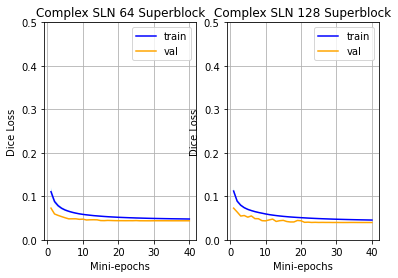

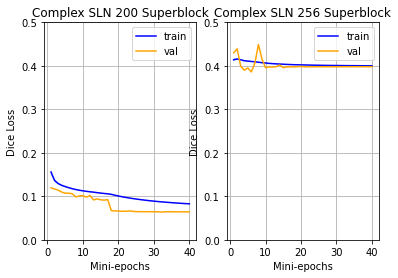

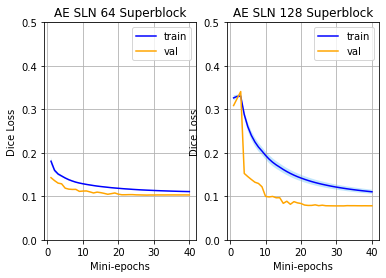

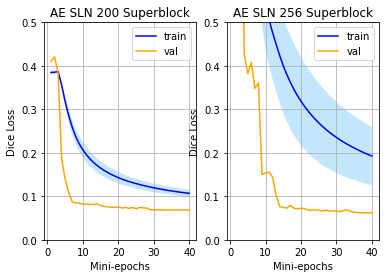

In [17]:
print("configuring combined plots")
domain = len(train_scores1)
x_values = [i+1 for i in range(domain)]
             
a1 = plt.subplot(1,2,1)
a1.set_ylim([0, 0.5])
plt.title("Complex SLN 64 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores1, train_var_1)]
ziptraindown = [a - b for a, b in zip(train_scores1, train_var_1)]
zipvalup = [a + b for a, b in zip(val_scores1, val_var_1)]
zipvaldown = [a - b for a, b in zip(val_scores1, val_var_1)]

plt.plot(x_values, train_scores1, color="blue", label="train")
a1.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores1, color="orange", label="val")
a1.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a2 = plt.subplot(1,2,2)
a2.set_ylim([0, 0.5])
plt.title("Complex SLN 128 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores2, train_var_2)]
ziptraindown = [a - b for a, b in zip(train_scores2, train_var_2)]
zipvalup = [a + b for a, b in zip(val_scores2, val_var_2)]
zipvaldown = [a - b for a, b in zip(val_scores2, val_var_2)]

plt.plot(x_values, train_scores2, color="blue", label="train")
a2.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores2, color="orange", label="val")
a2.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

a3 = plt.subplot(1,2,1)
a3.set_ylim([0, 0.5])
plt.title("Complex SLN 200 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores3, train_var_3)]
ziptraindown = [a - b for a, b in zip(train_scores3, train_var_3)]
zipvalup = [a + b for a, b in zip(val_scores3, val_var_3)]
zipvaldown = [a - b for a, b in zip(val_scores3, val_var_3)]

plt.plot(x_values, train_scores3, color="blue", label="train")
a3.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores3, color="orange", label="val")
a3.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a4 = plt.subplot(1,2,2)
a4.set_ylim([0, 0.5])
plt.title("Complex SLN 256 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores4, train_var_4)]
ziptraindown = [a - b for a, b in zip(train_scores4, train_var_4)]
zipvalup = [a + b for a, b in zip(val_scores4, val_var_4)]
zipvaldown = [a - b for a, b in zip(val_scores4, val_var_4)]

plt.plot(x_values, train_scores4, color="blue", label="train")
a4.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores4, color="orange", label="val")
a4.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

a5 = plt.subplot(1,2,1)
a5.set_ylim([0, 0.5])
plt.title("AE SLN 64 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores5, train_var_5)]
ziptraindown = [a - b for a, b in zip(train_scores5, train_var_5)]
zipvalup = [a + b for a, b in zip(val_scores5, val_var_5)]
zipvaldown = [a - b for a, b in zip(val_scores5, val_var_5)]

plt.plot(x_values, train_scores5, color="blue", label="train")
a5.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores5, color="orange", label="val")
a5.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a6 = plt.subplot(1,2,2)
a6.set_ylim([0, 0.5])
plt.title("AE SLN 128 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores6, train_var_6)]
ziptraindown = [a - b for a, b in zip(train_scores6, train_var_6)]
zipvalup = [a + b for a, b in zip(val_scores6, val_var_6)]
zipvaldown = [a - b for a, b in zip(val_scores6, val_var_6)]

plt.plot(x_values, train_scores6, color="blue", label="train")
a6.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores6, color="orange", label="val")
a6.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

a7 = plt.subplot(1,2,1)
a7.set_ylim([0, 0.5])
plt.title("AE SLN 200 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores7, train_var_7)]
ziptraindown = [a - b for a, b in zip(train_scores7, train_var_7)]
zipvalup = [a + b for a, b in zip(val_scores7, val_var_7)]
zipvaldown = [a - b for a, b in zip(val_scores7, val_var_7)]

plt.plot(x_values, train_scores7, color="blue", label="train")
a7.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores7, color="orange", label="val")
a7.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a8 = plt.subplot(1,2,2)
a8.set_ylim([0, 0.5])
plt.title("AE SLN 256 Superblock")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores8, train_var_8)]
ziptraindown = [a - b for a, b in zip(train_scores8, train_var_8)]
zipvalup = [a + b for a, b in zip(val_scores8, val_var_8)]
zipvaldown = [a - b for a, b in zip(val_scores8, val_var_8)]

plt.plot(x_values, train_scores8, color="blue", label="train")
a8.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores8, color="orange", label="val")
a8.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.show()

plt.close()

In [23]:
np.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_64.npy",net1.W.cpu().data)
np.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_128.npy",net2.W.cpu().data)
np.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_200.npy",net3.W.cpu().data)
np.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/SLN_256.npy",net4.W.cpu().data)
np.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_64.npy",net5.W.cpu().data)
np.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_128.npy",net6.W.cpu().data)
np.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_200.npy",net7.W.cpu().data)
np.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/AE_256.npy",net8.W.cpu().data)